In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import seaborn as sns

In [14]:
#Variables for the regared measures
metric = ":balanced_accuracy"
#metric = ":rooted_mean_squared_error"

In [15]:

mapping = {':autokeras': 1, ':lama': 2, ':evalml': 3, ':gama': 4, ':autogluon': 5, ':pycaret': 6, ':flaml': 7, ':tpot': 8, ':mljar': 9, ":h2o_automl": 10}

file_path = "../data"
df = pd.read_csv(os.path.join(file_path,"datasetBestAutoMLData.csv"))
df_copy = df.copy()

df_copy["AutoML_adapter"] = df_copy["AutoML_adapter"].map(mapping)

with open(os.path.join(file_path , "runtime_prediction_parameters.json"), "r") as f:
    parameter = json.load(f)

groups = df.groupby(["task"])

In [16]:
def plot(title: str, x_label: str, y_label: str, title_legend: str, bbox=(0.95, 1) ):
    """sets the parameters for the plot

    Args:
        title (str): the title of the plot
        x_label (str): the x label of the plot
        y_label (str): the y label of the plot
        title_legend (str): the name of the legend
        bbox (tuple, optional): the size of the legend. Defaults to (0.95, 1).
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.title(title)
    plt.legend(title=title_legend, bbox_to_anchor=bbox, loc="upper left")
    plt.show()

In [17]:
value_distribution = df_copy[':balanced_accuracy'].value_counts()

print(value_distribution)
value_of_interest = 0.00000

# Get the count of the value of interest
count_of_interest = value_distribution.get(value_of_interest, 0)

# Calculate the percentage
percentage = (count_of_interest / len(df_copy[':balanced_accuracy'])) * 100

print(f"The percentage of '{value_of_interest}' occurrences: {percentage:.2f}%")

:balanced_accuracy
0.000000    373
1.000000    192
0.500000     38
0.995372     31
0.942029     12
           ... 
0.929825      1
0.923977      1
0.660849      1
0.982456      1
0.660091      1
Name: count, Length: 1201, dtype: int64
The percentage of '0.0' occurrences: 14.57%


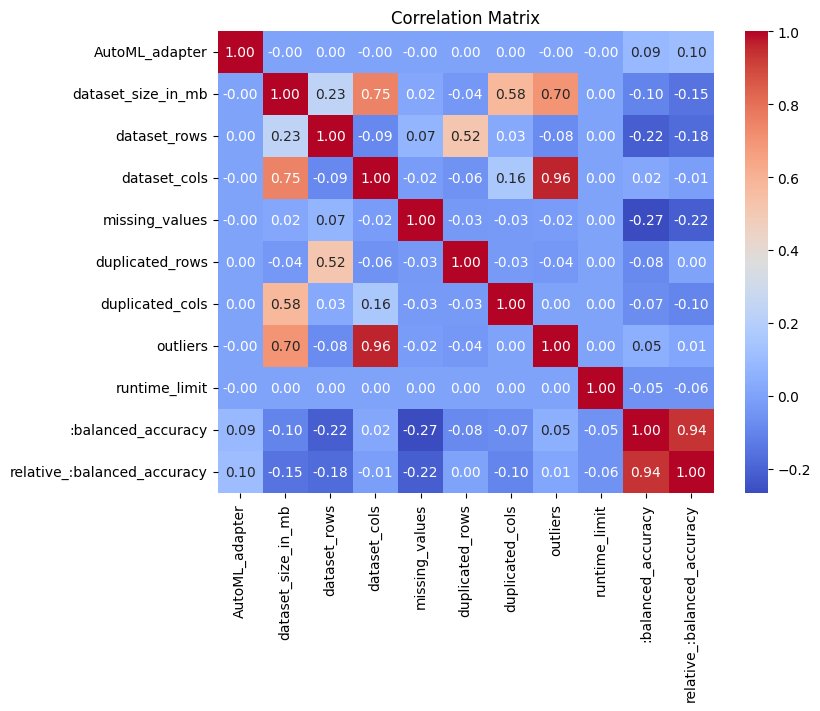

In [18]:


corr_matrix = df_copy.drop(["Unnamed: 0", "task", "trainings_id", "dataset_name"], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

This section generates plots for evey AutoMl to descibe the relation between the relative balanced accuracy / rmse and the size of the dataset

<Figure size 640x480 with 0 Axes>

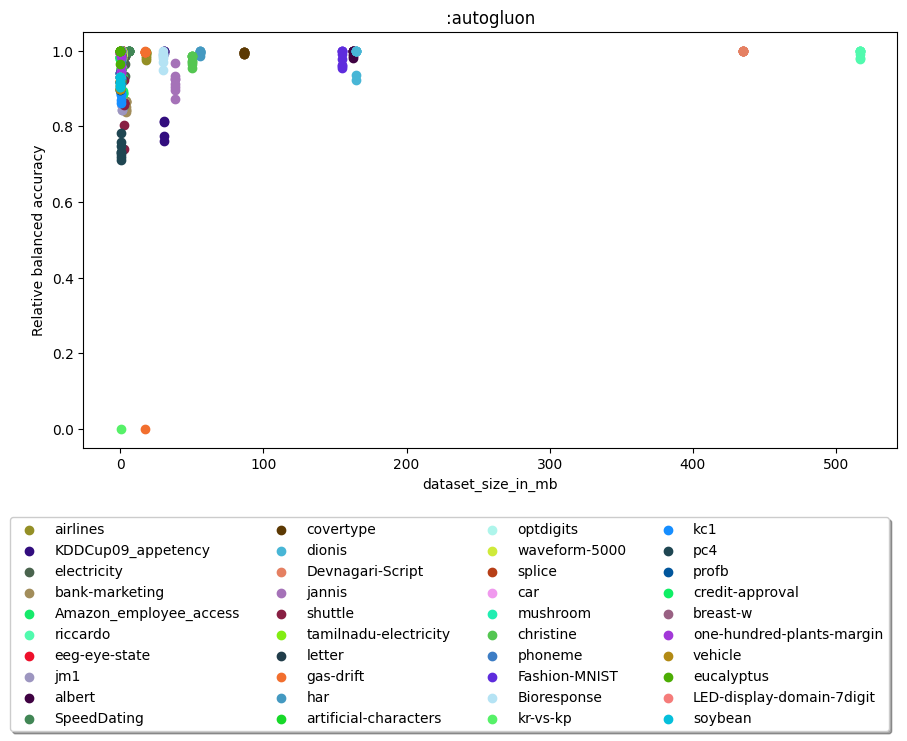

<Figure size 640x480 with 0 Axes>

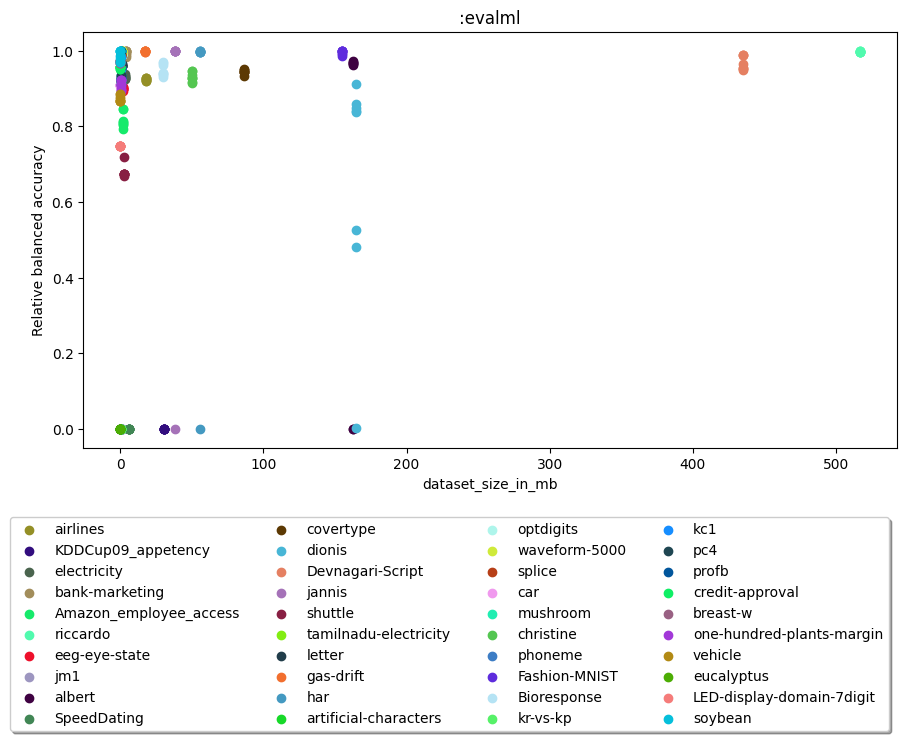

<Figure size 640x480 with 0 Axes>

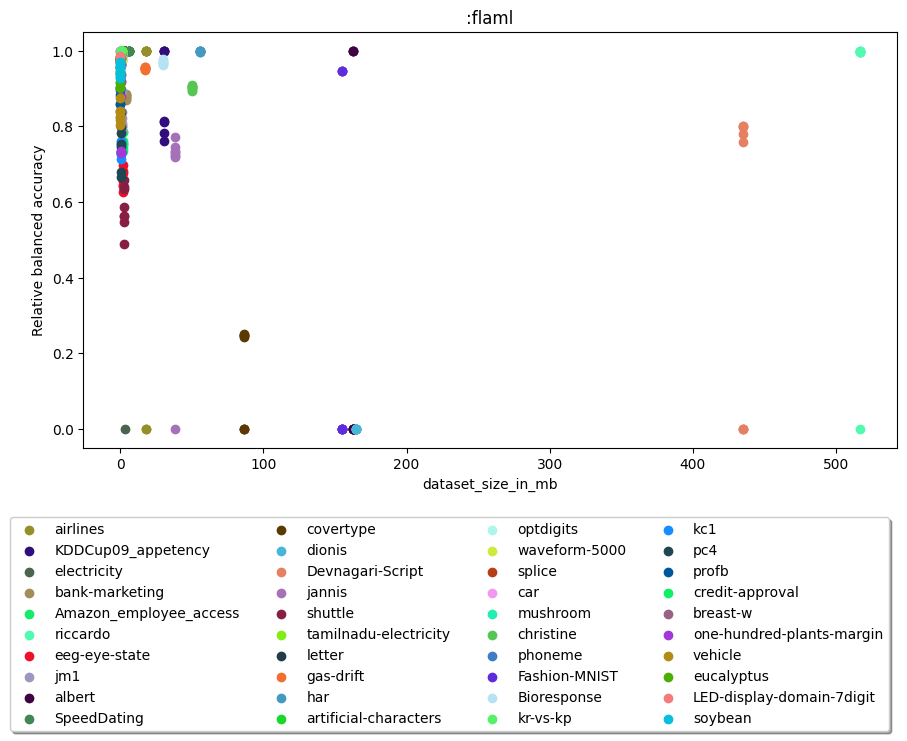

<Figure size 640x480 with 0 Axes>

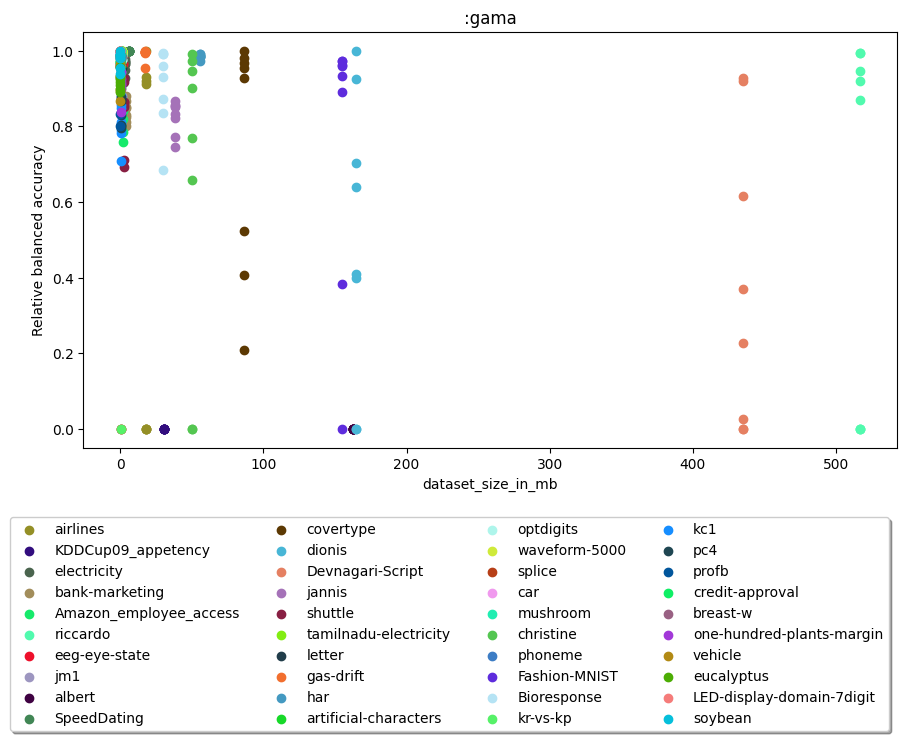

<Figure size 640x480 with 0 Axes>

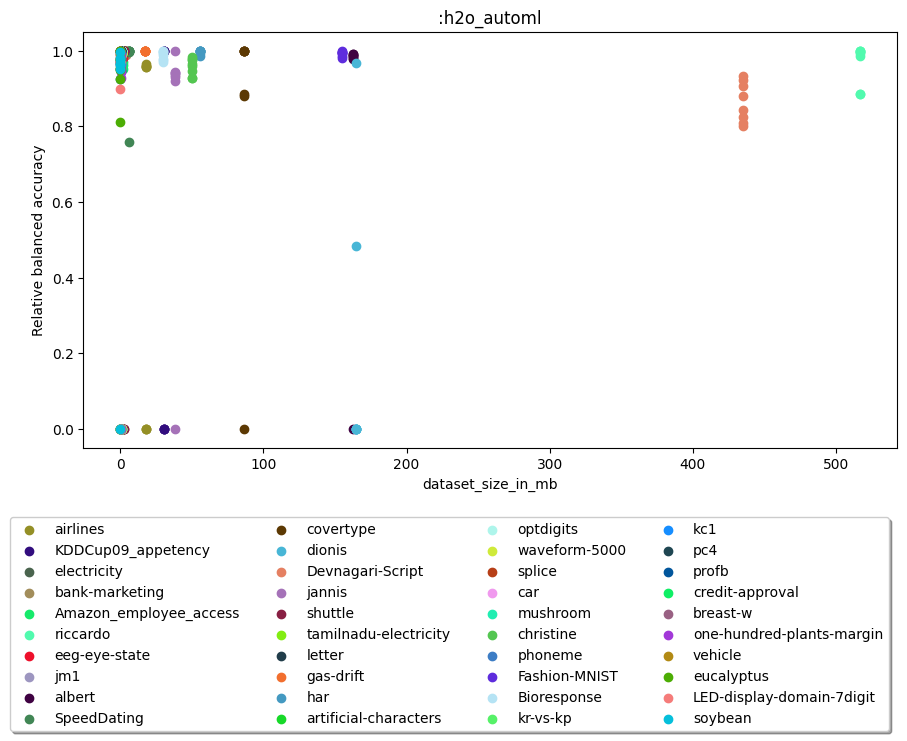

<Figure size 640x480 with 0 Axes>

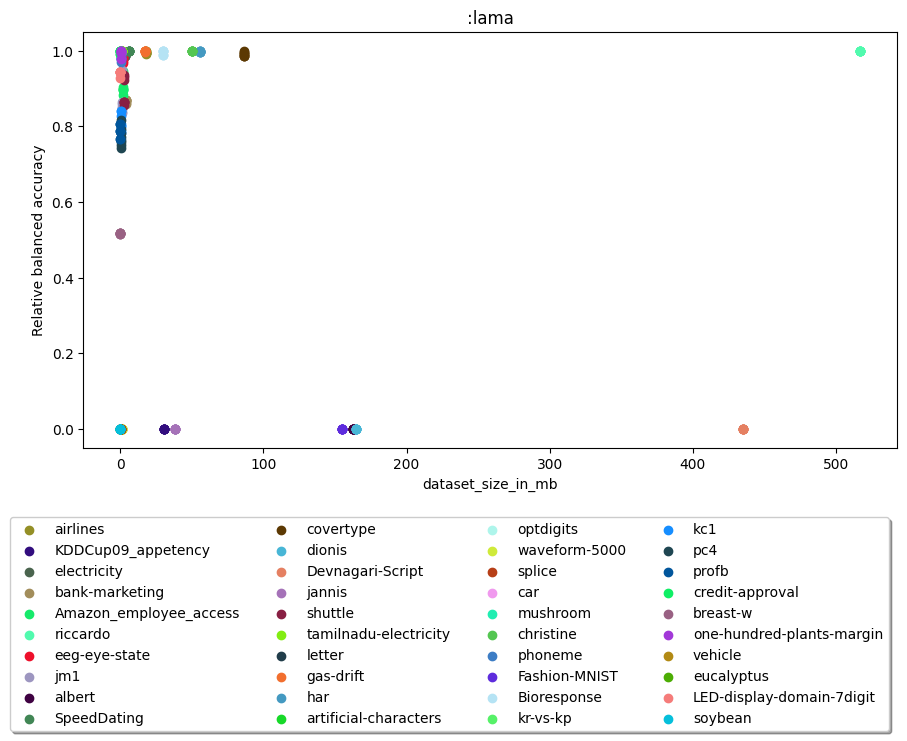

<Figure size 640x480 with 0 Axes>

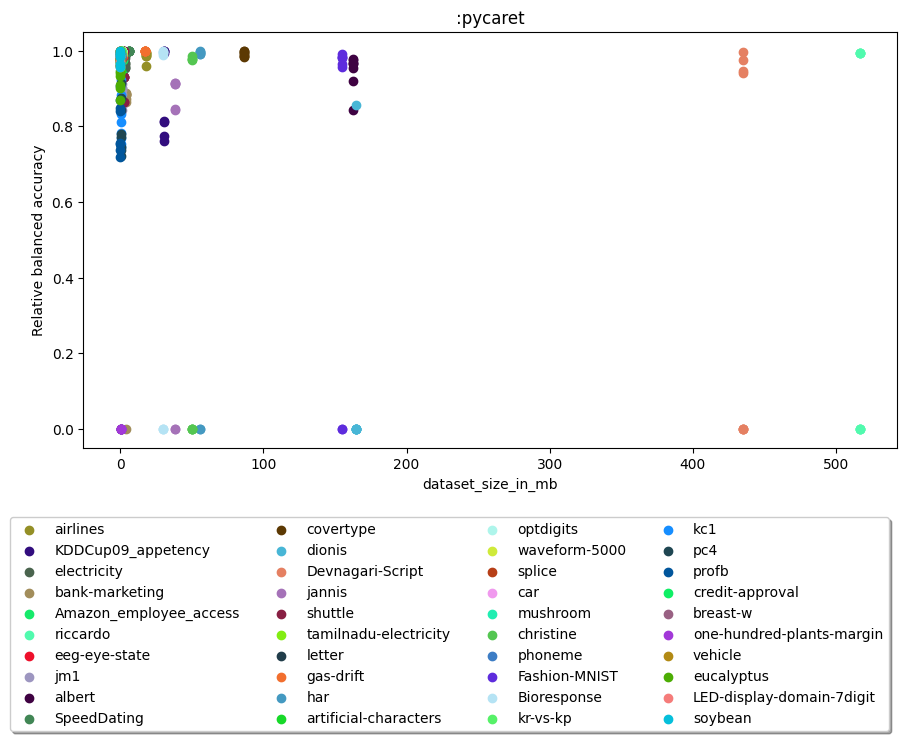

<Figure size 640x480 with 0 Axes>

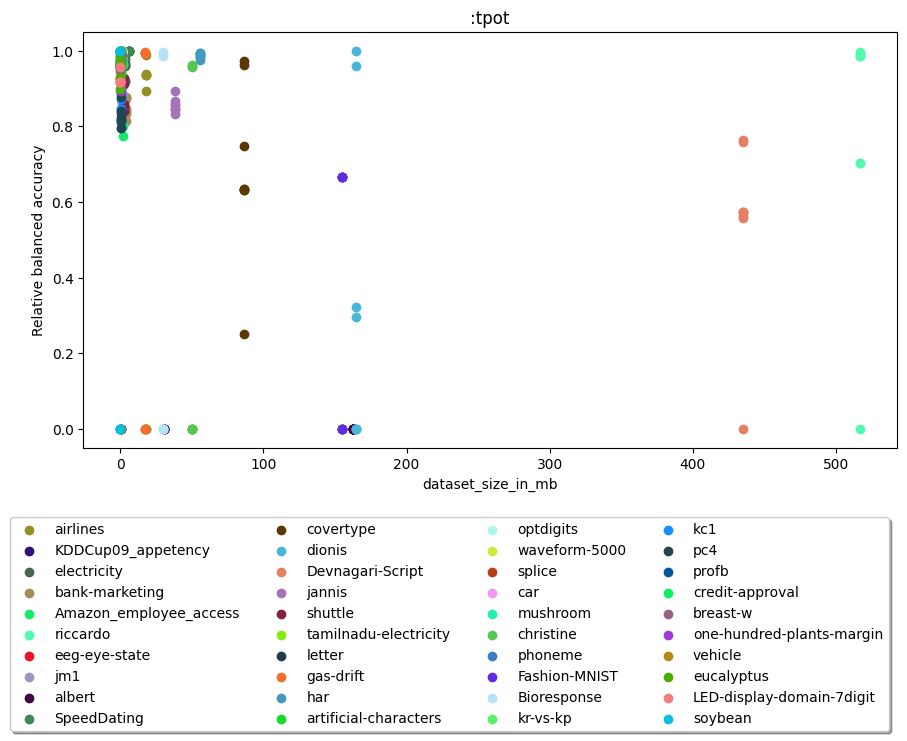

<Figure size 640x480 with 0 Axes>

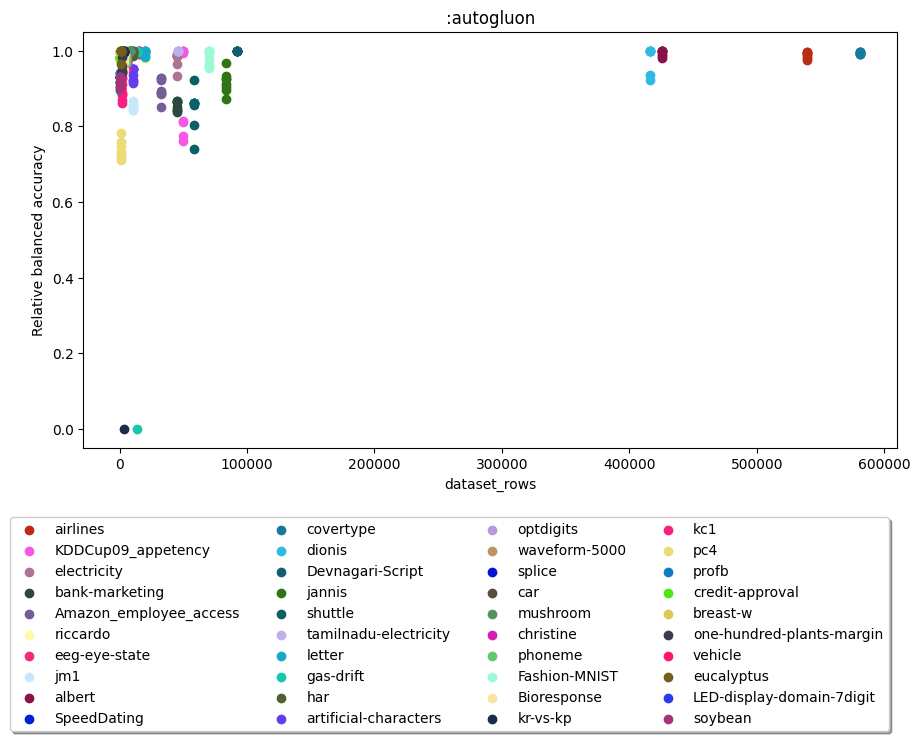

<Figure size 640x480 with 0 Axes>

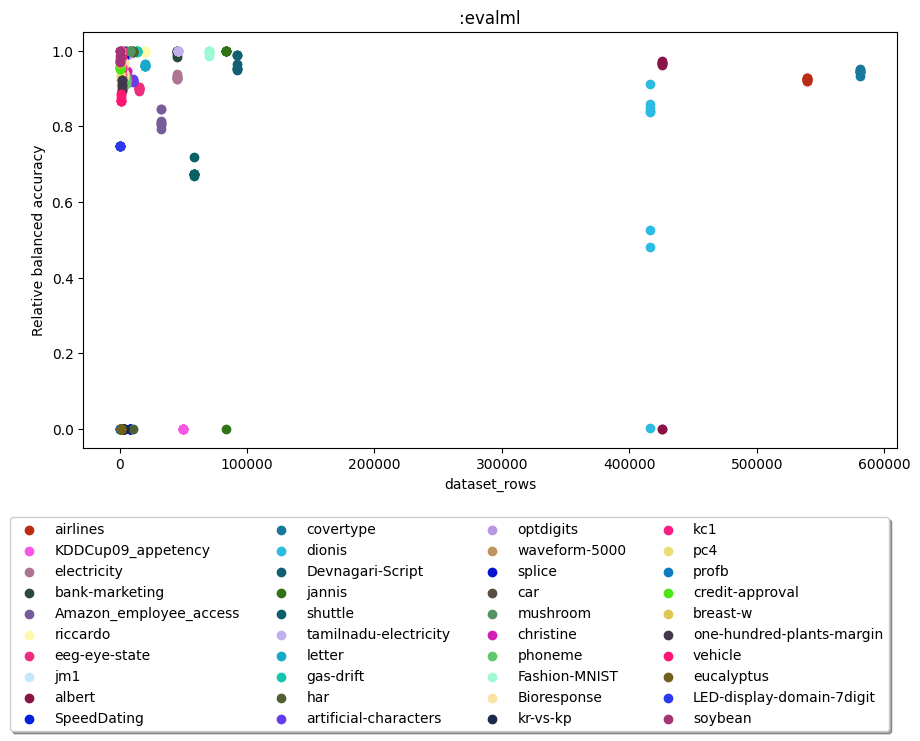

<Figure size 640x480 with 0 Axes>

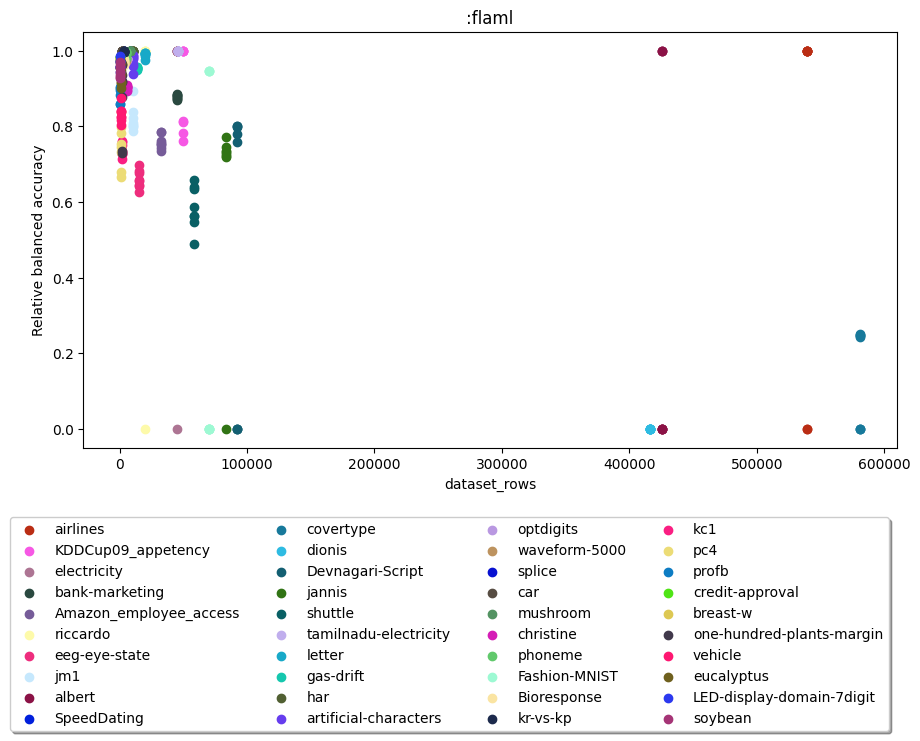

<Figure size 640x480 with 0 Axes>

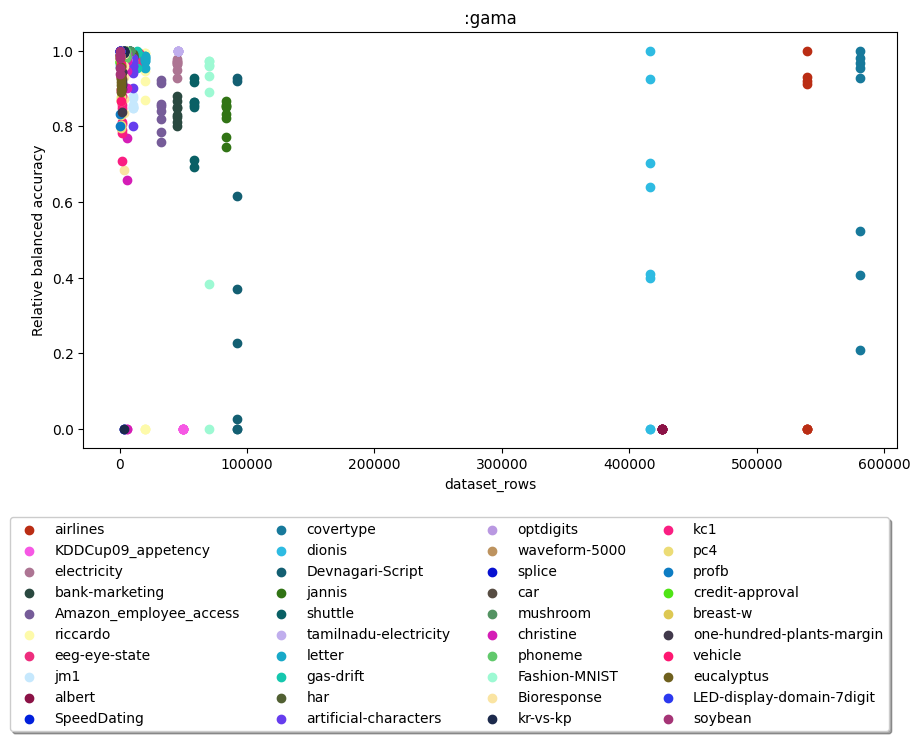

<Figure size 640x480 with 0 Axes>

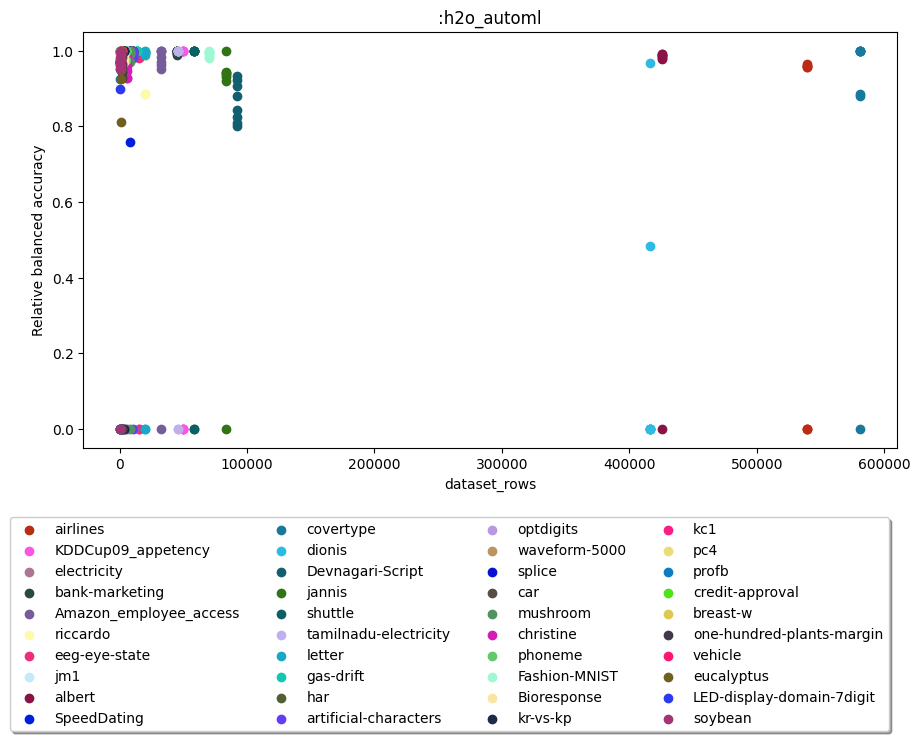

<Figure size 640x480 with 0 Axes>

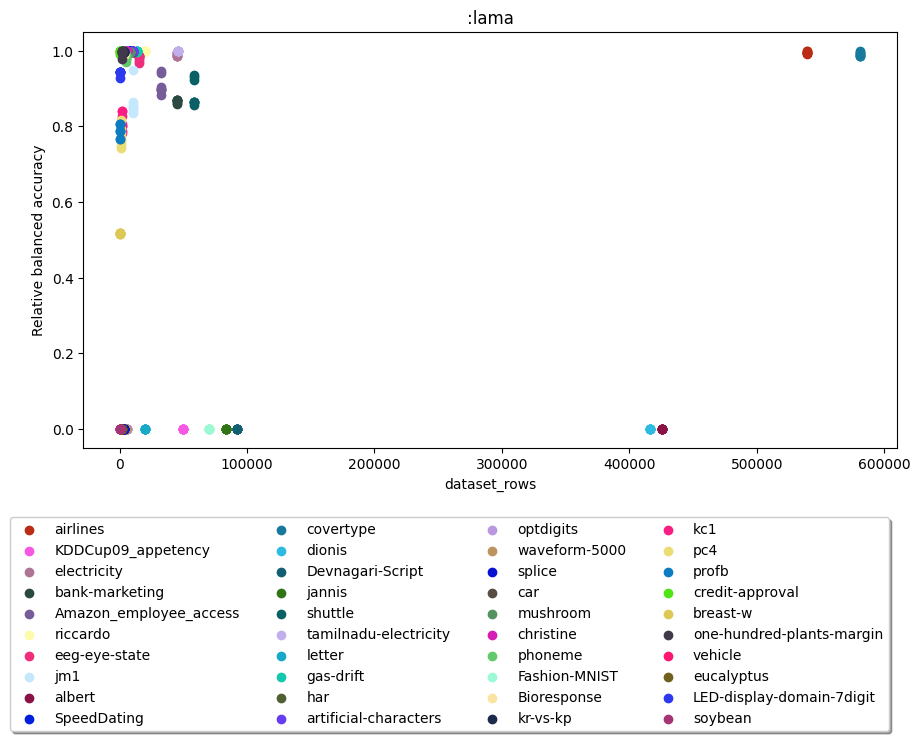

<Figure size 640x480 with 0 Axes>

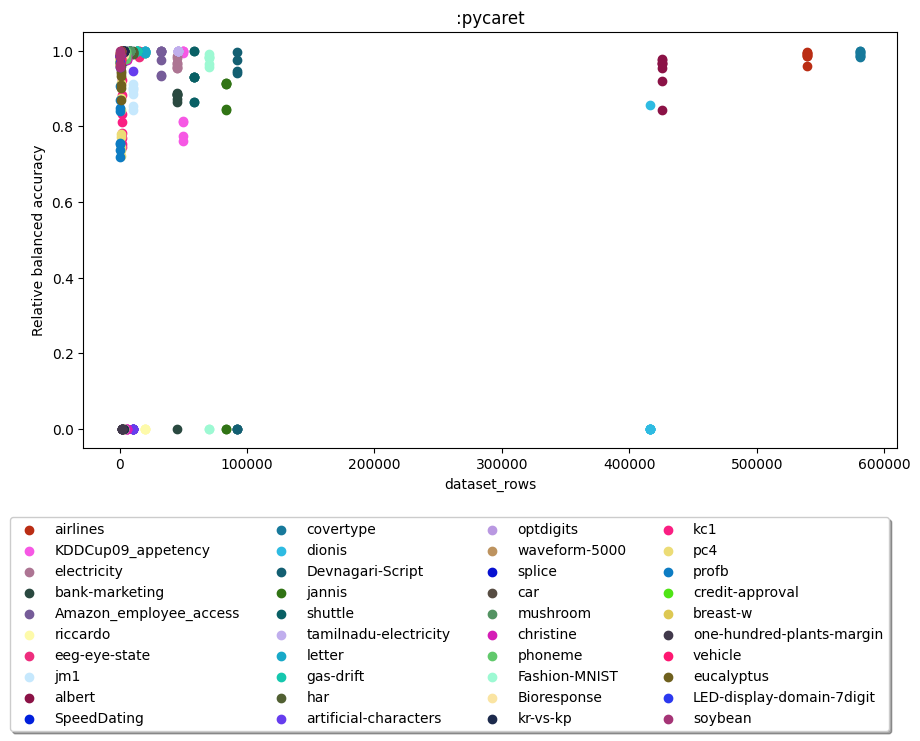

<Figure size 640x480 with 0 Axes>

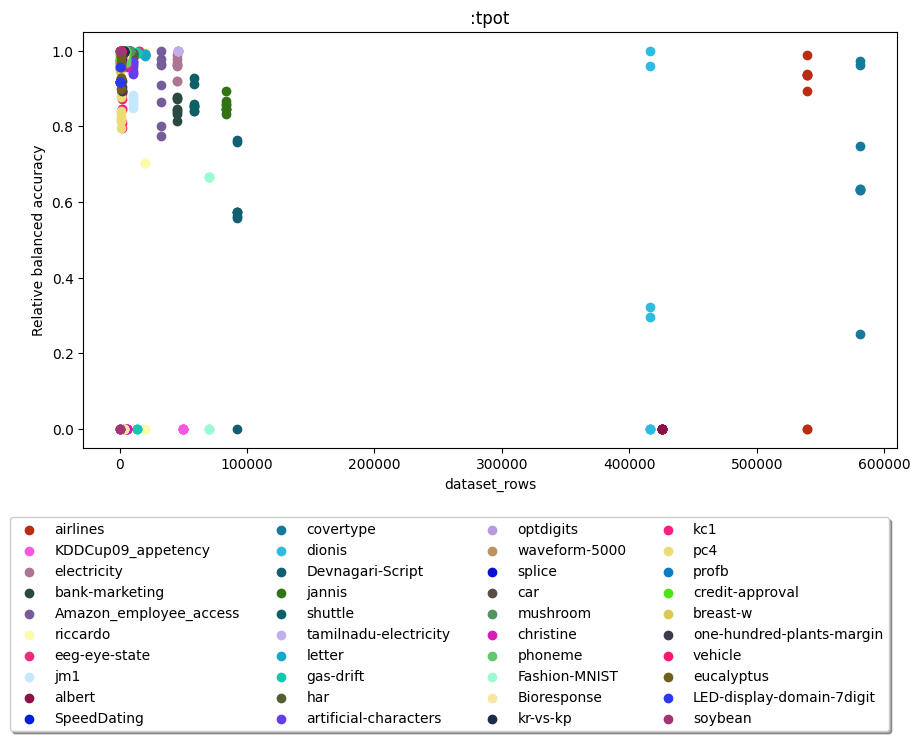

<Figure size 640x480 with 0 Axes>

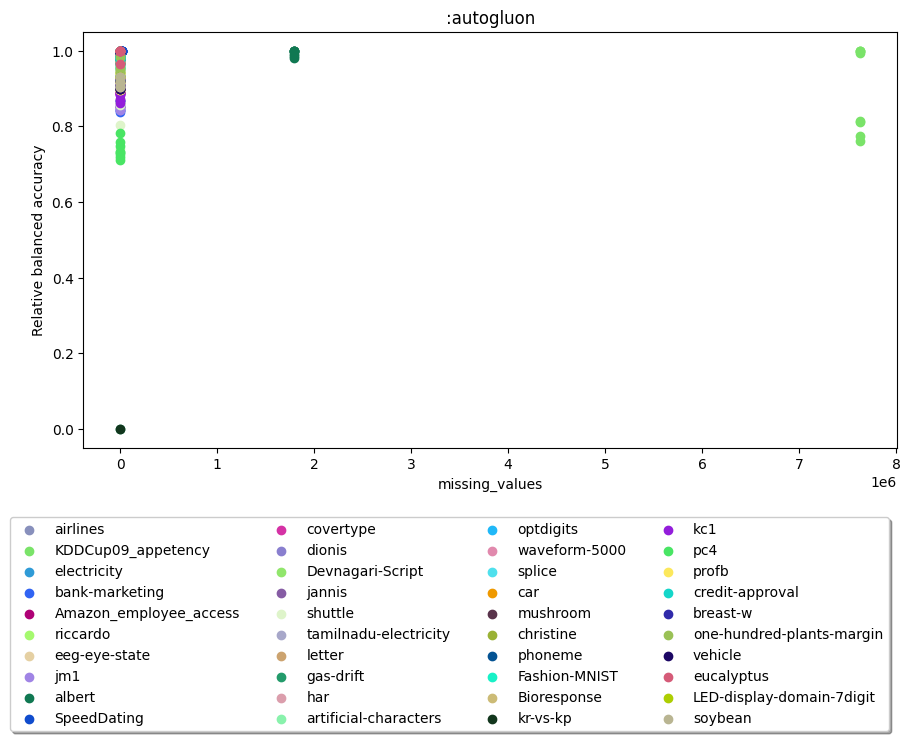

<Figure size 640x480 with 0 Axes>

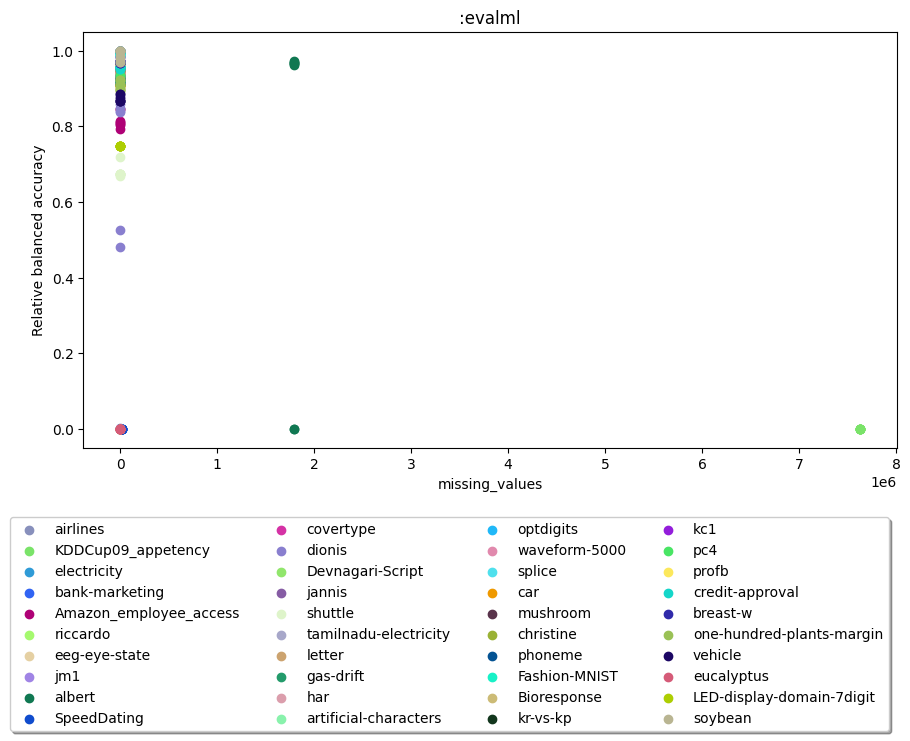

<Figure size 640x480 with 0 Axes>

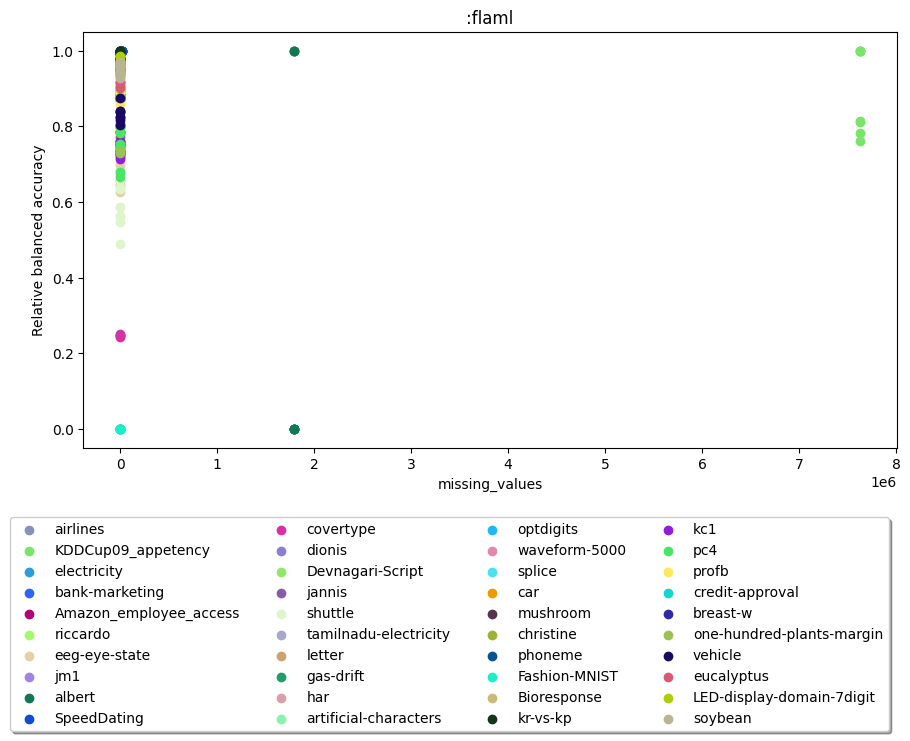

<Figure size 640x480 with 0 Axes>

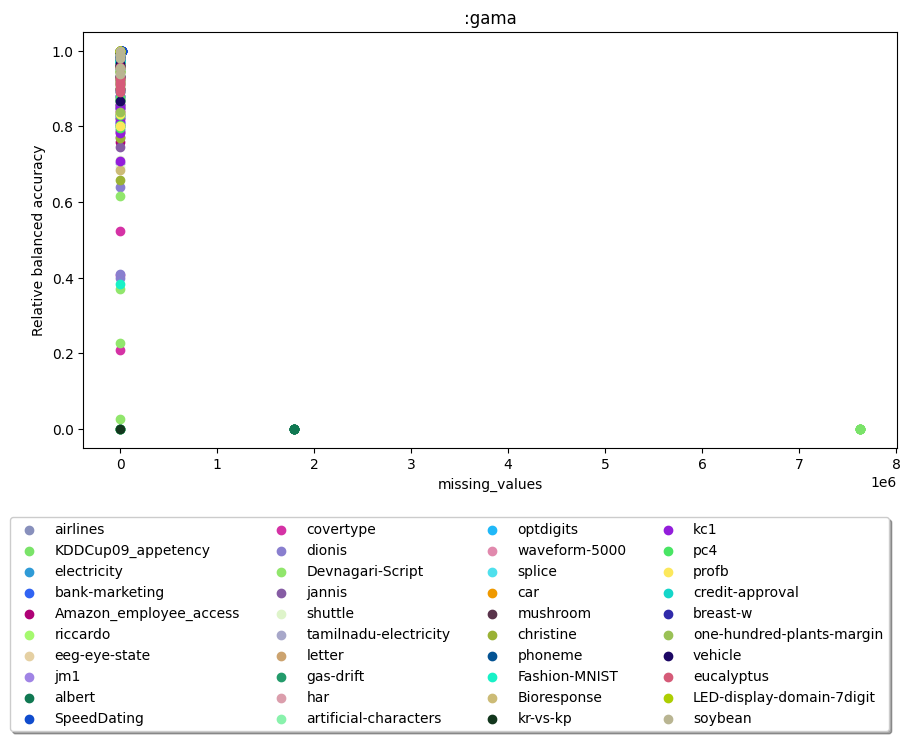

<Figure size 640x480 with 0 Axes>

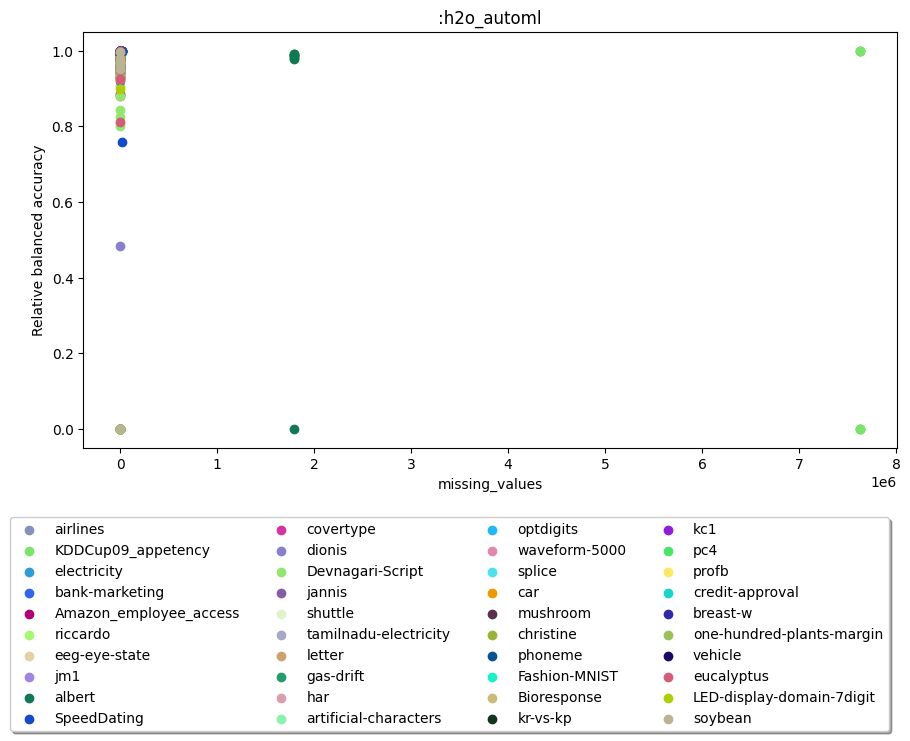

<Figure size 640x480 with 0 Axes>

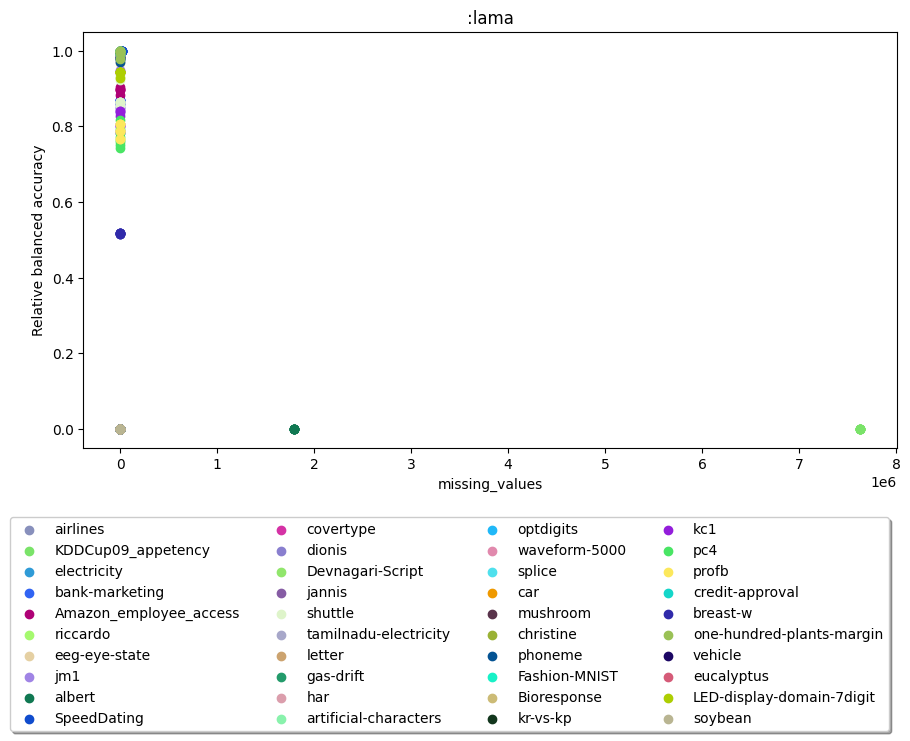

<Figure size 640x480 with 0 Axes>

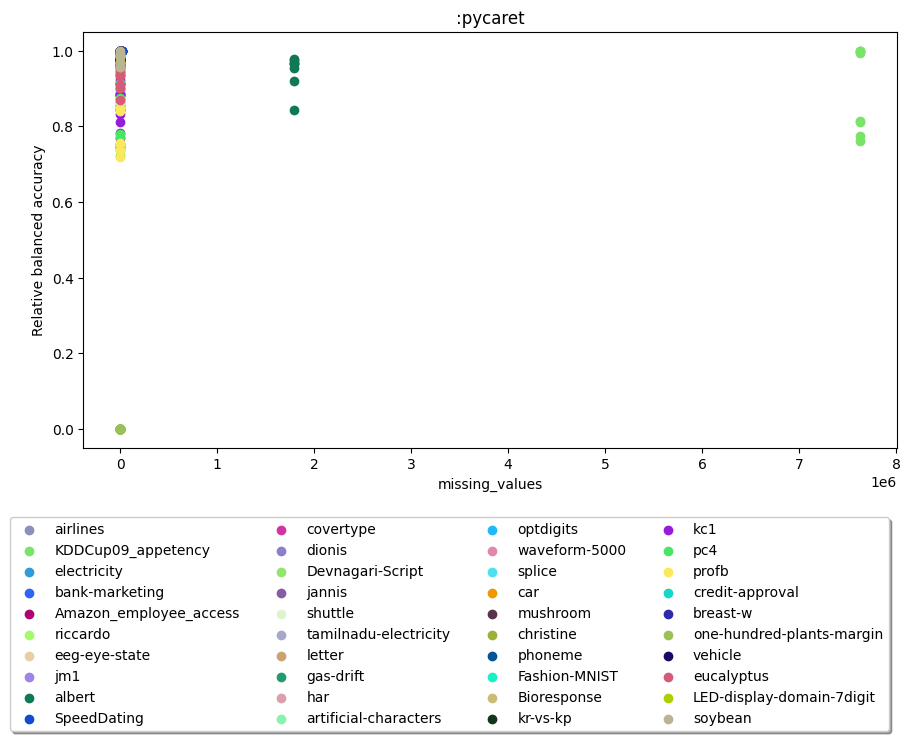

<Figure size 640x480 with 0 Axes>

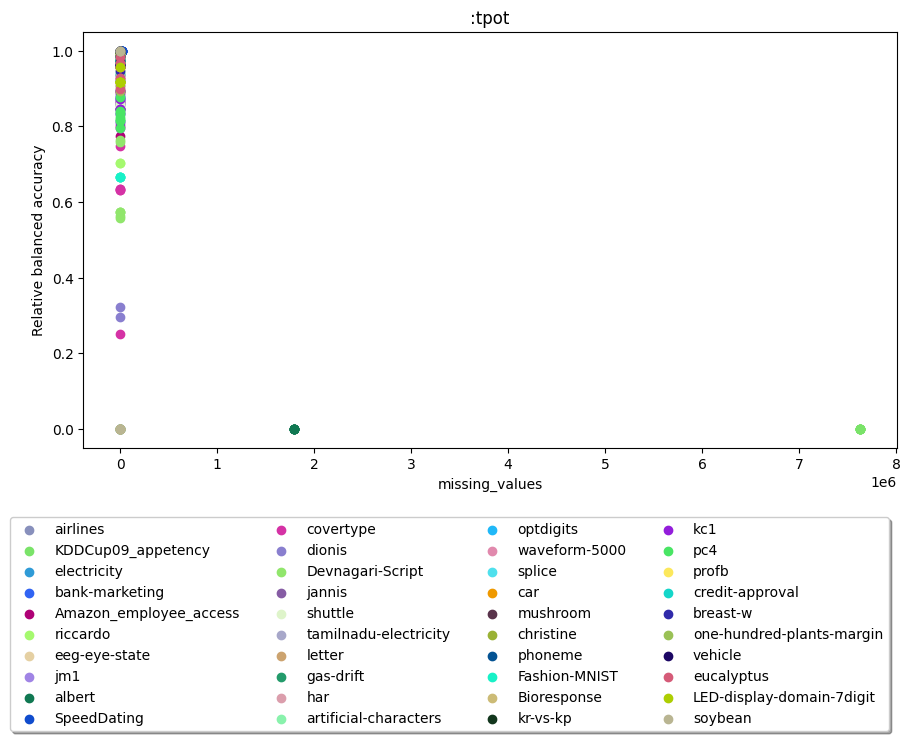

<Figure size 640x480 with 0 Axes>

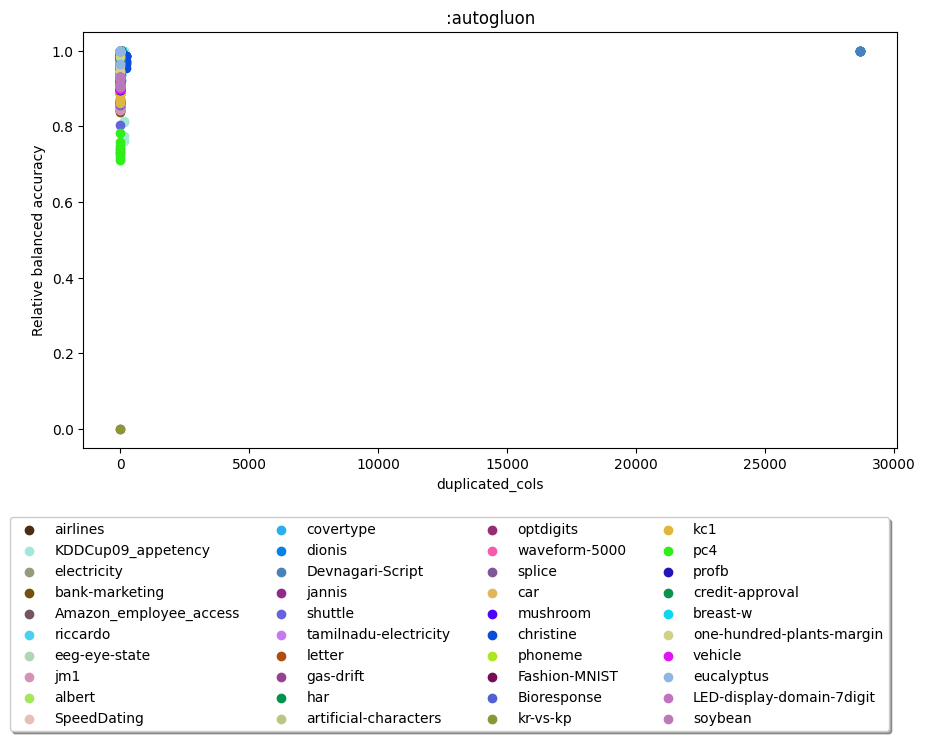

<Figure size 640x480 with 0 Axes>

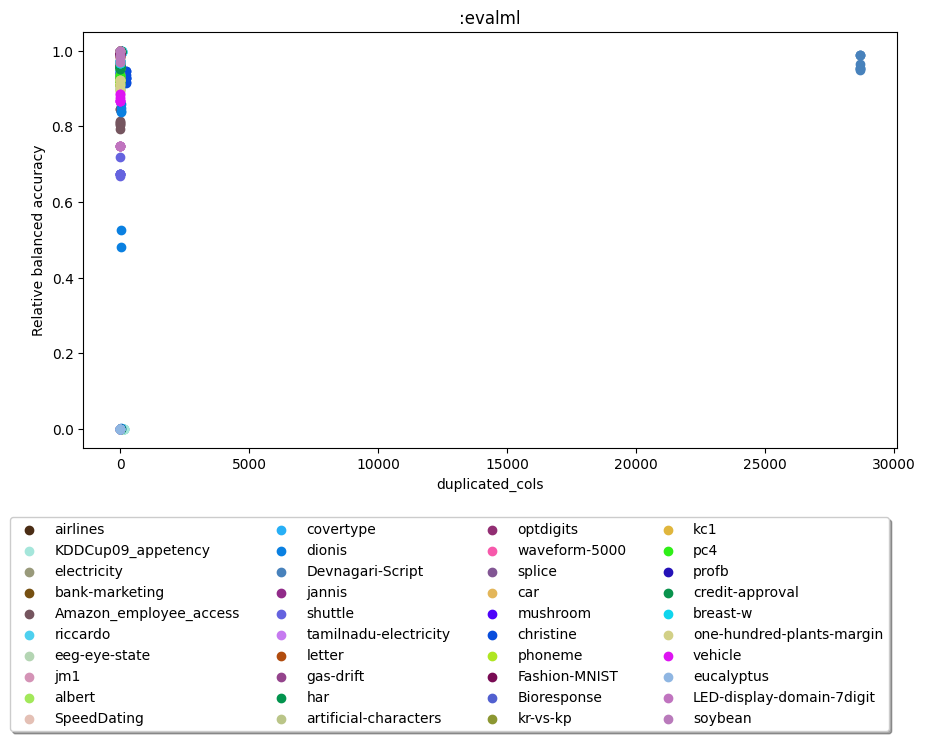

<Figure size 640x480 with 0 Axes>

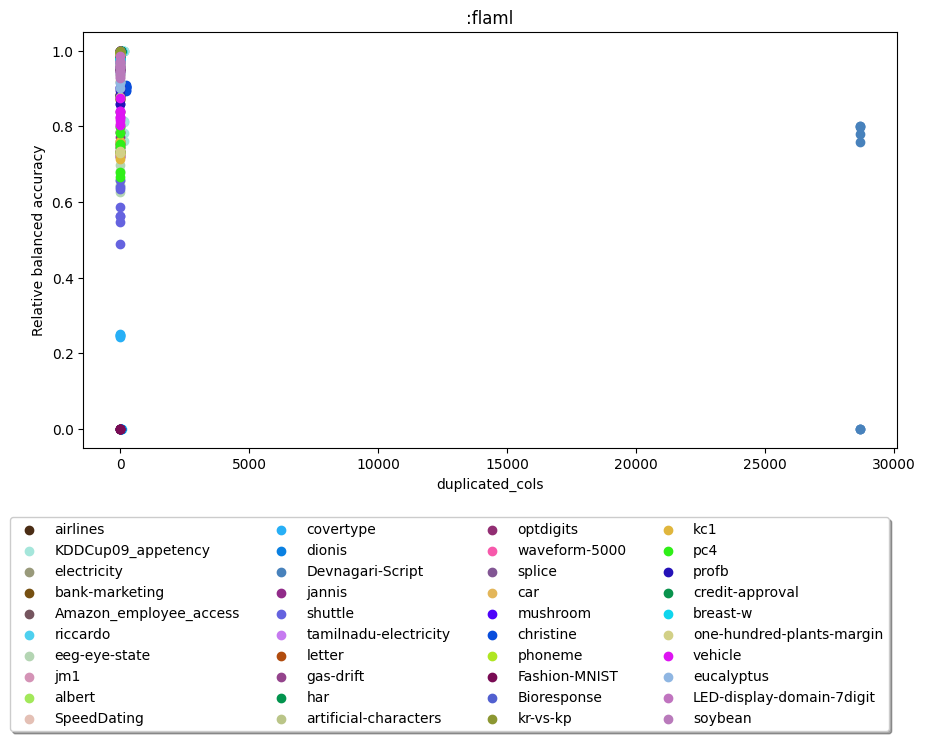

<Figure size 640x480 with 0 Axes>

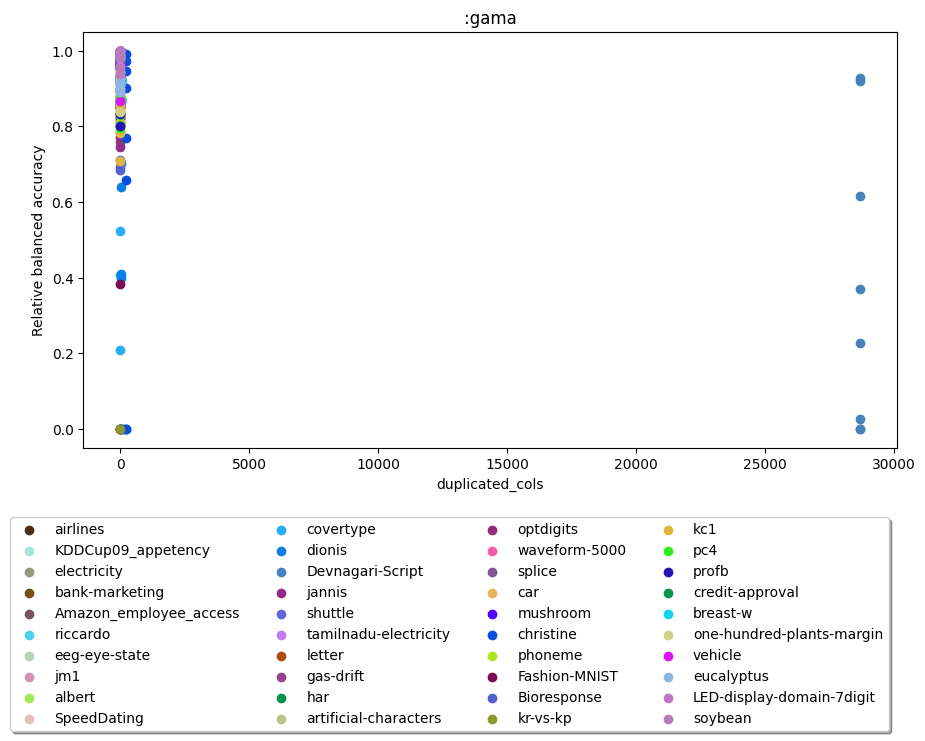

<Figure size 640x480 with 0 Axes>

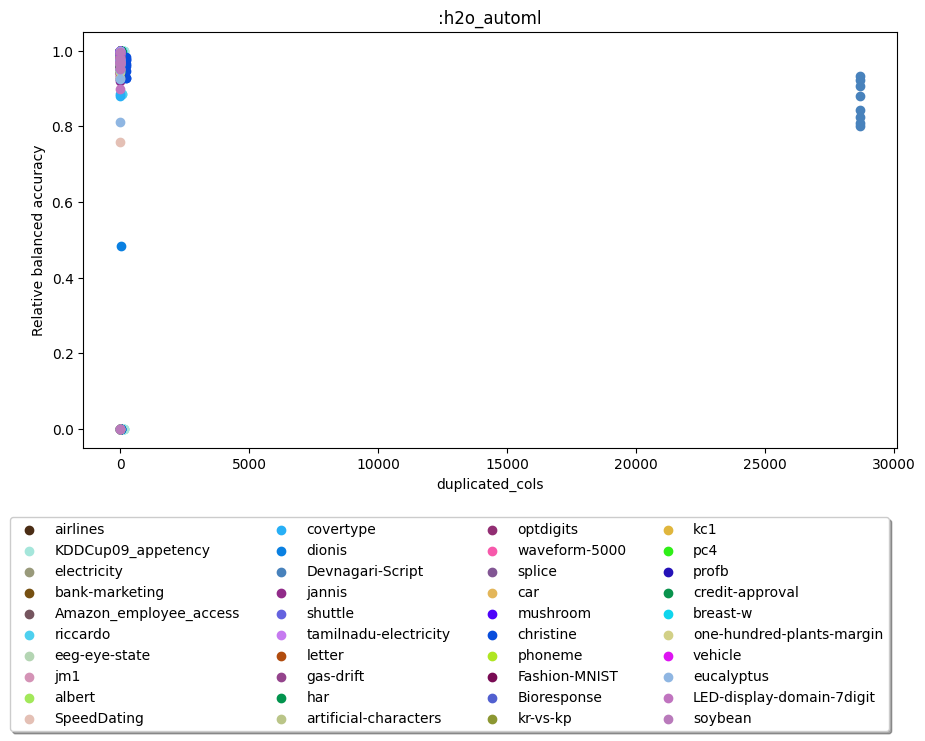

<Figure size 640x480 with 0 Axes>

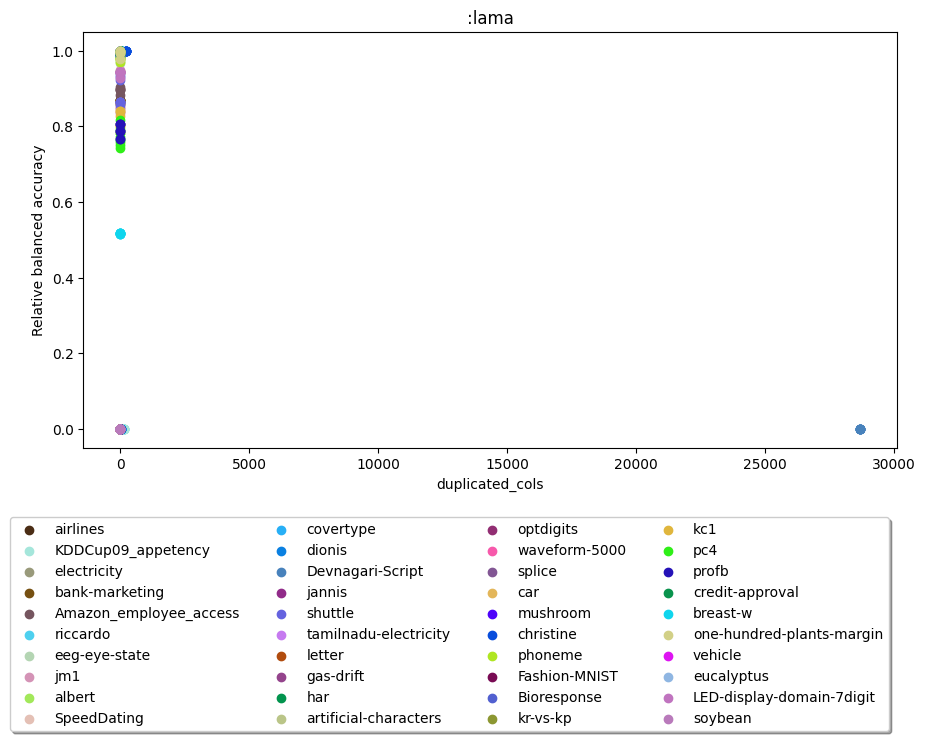

<Figure size 640x480 with 0 Axes>

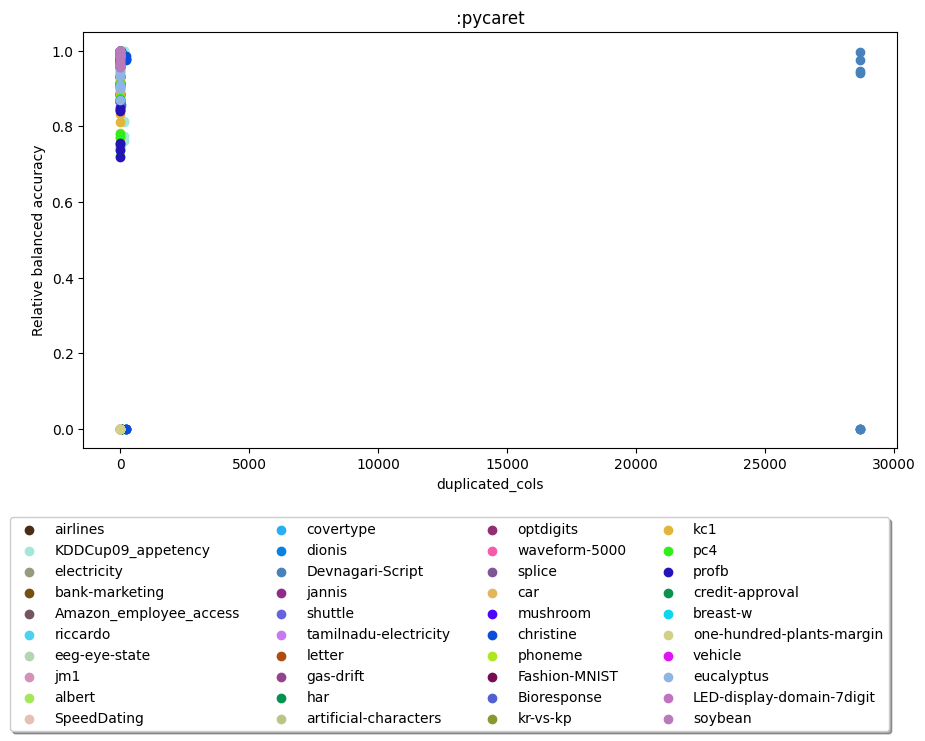

<Figure size 640x480 with 0 Axes>

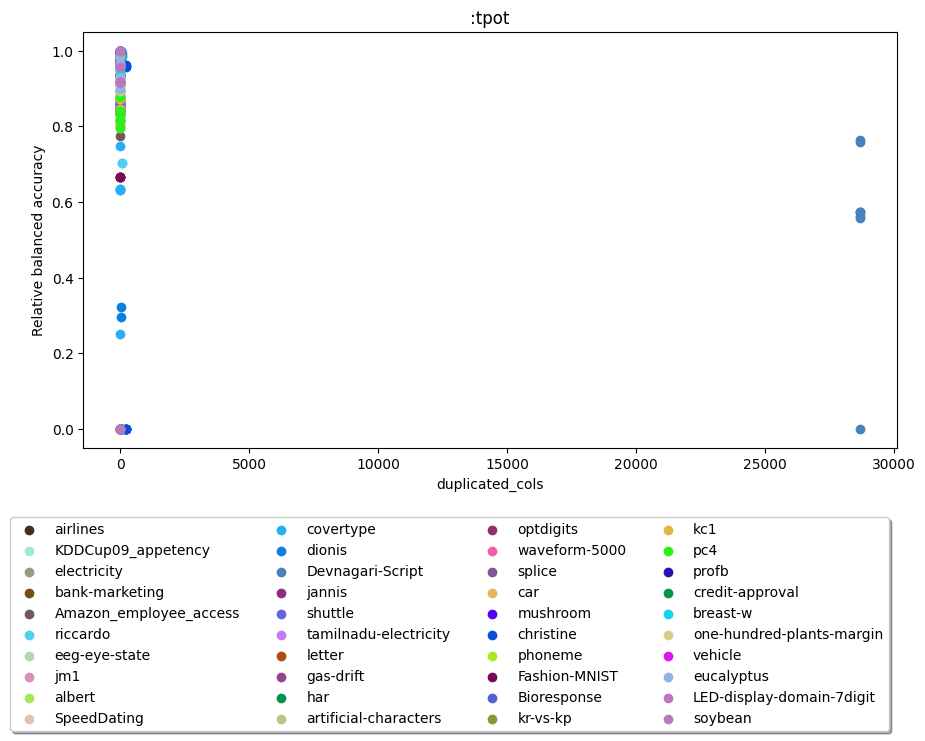

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create plots accuracy and size
parameters = ["dataset_size_in_mb", "dataset_rows", "missing_values", "duplicated_cols"]
for para in parameters:
    for group in groups:
        automls = group[1].groupby(["AutoML_adapter"])
        unique_names = group[1]["dataset_name"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        
        # Create a wider plot (adjust width, height as needed)
        
        for automl in automls:
            if automl[1]["task"].unique()[0] == ":tabular_classification":
                fig = plt.figure()
                plt.figure(figsize=(10.5, 6))  # Adjust width to make more space for the legend
                ax = plt.subplot(111)
                for i, name in enumerate(unique_names):
                    data = automl[1][automl[1]["dataset_name"] == name]
                    ax.scatter(data[para], data["relative_" + metric], label=name, color=colors[i])
                #plt.plot(automl[1]["AutoML_adapter"].unique()[0], para, "relative balanced accuracy score", "Datasetname")
        
                # Adjust legend position to be on the right with two columns
                
                # Adjust layout to prevent clipping of the legend and make space for it
                #plt.tight_layout()
                # Shrink current axis's height by 10% on the bottom
                box = ax.get_position()
                ax.set_position([box.x0, box.y0 + box.height * 0.1,
                                box.width, box.height * 0.9])

                # Put a legend below current axis
                ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.15),
                        fancybox=True, shadow=True, ncol=4)
                plt.xlabel(para)
                plt.ylabel("Relative balanced accuracy")
                plt.title(automl[1]["AutoML_adapter"].unique()[0])
                #plt.tight_layout()  # Adjust to prevent clipping

                plt.show()


In [20]:
# # create plots accuracy and size
# parameters = ["dataset_size_in_mb", "dataset_rows", "missing_values", "duplicated_cols"]
# for para in parameters:
#     for group in groups:
#         automls = group[1].groupby(["AutoML_adapter"])
#         unique_names = group[1]["dataset_name"].unique()
#         colors = np.random.rand(len(set(unique_names)), 3)
#         for automl in automls:
#             if automl[1]["task"].unique()[0] == ":tabular_classification":
#                 for i, name in enumerate(unique_names):
#                     data = automl[1][automl[1]["dataset_name"] == name]
#                     plt.scatter(data[para], data["relative_"+ metric], label=name, color=colors[i])
#                 plot(automl[1]["AutoML_adapter"].unique()[0],para, "relative balanced accuracy score","Datasetname")

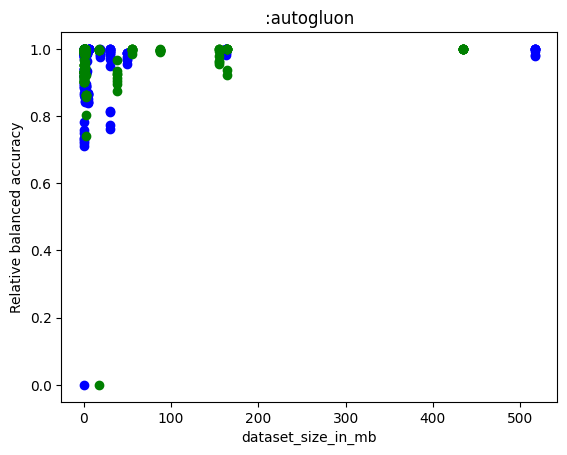

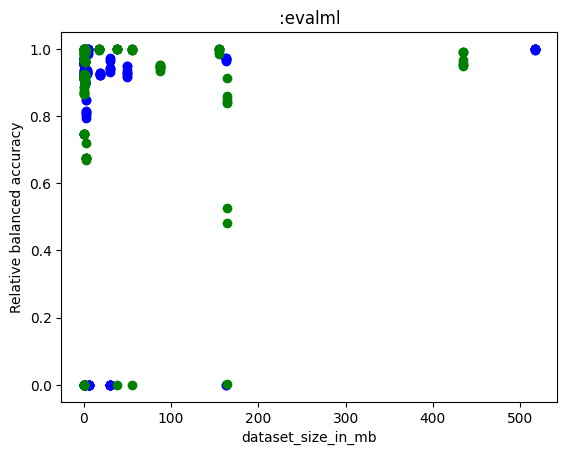

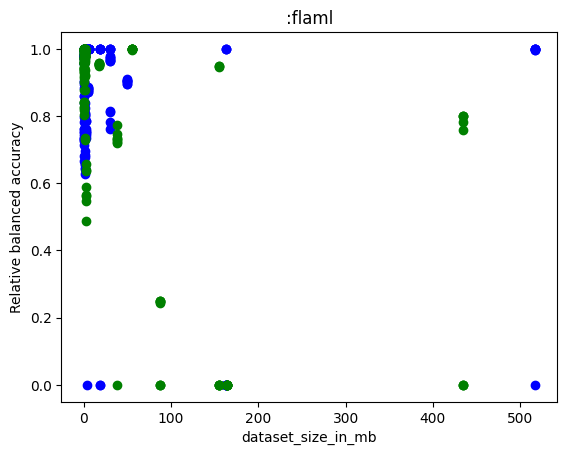

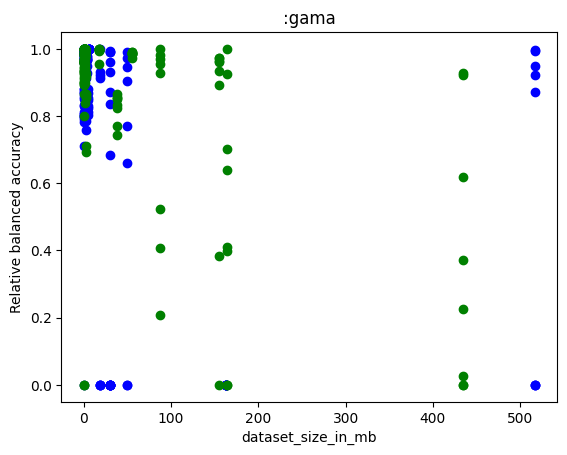

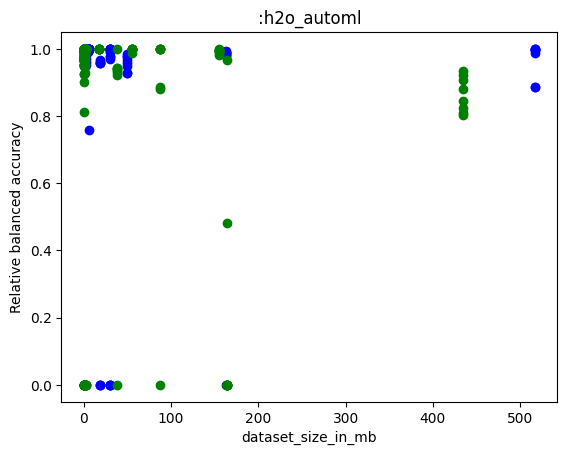

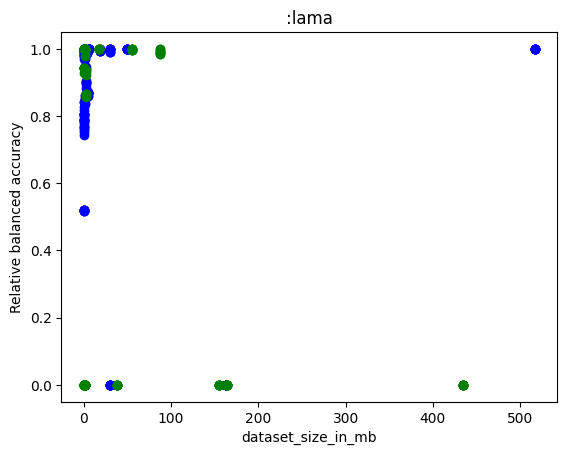

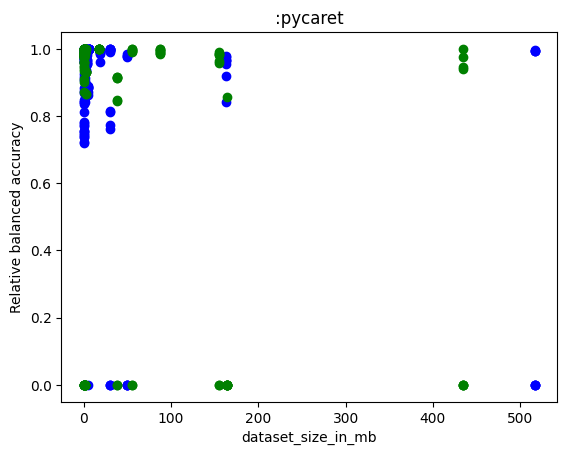

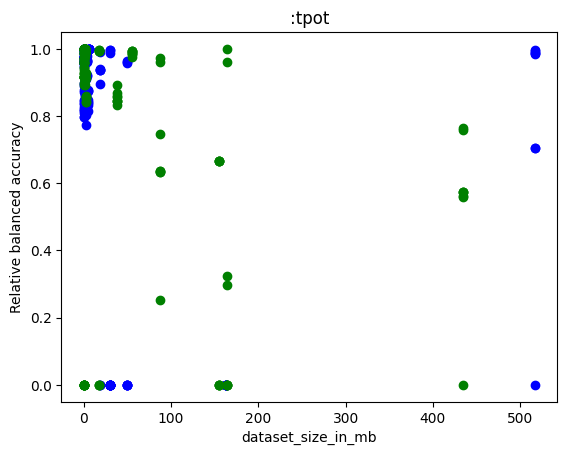

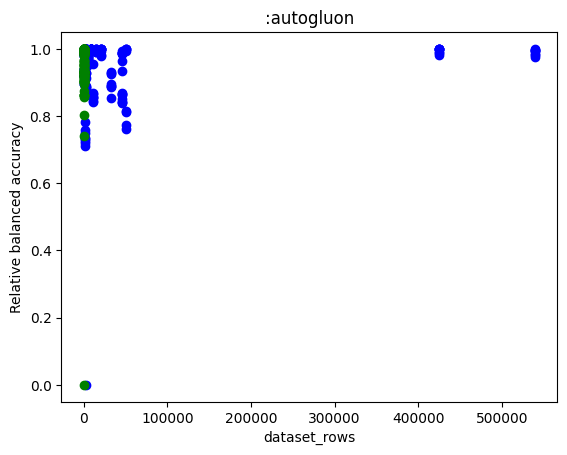

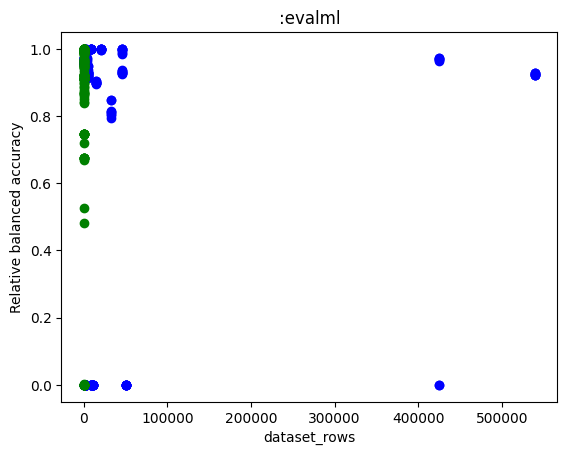

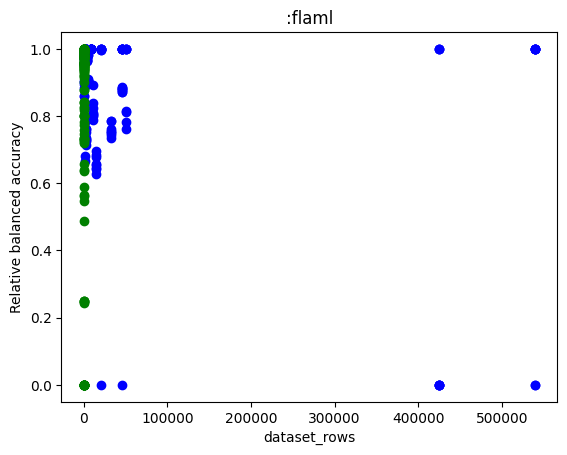

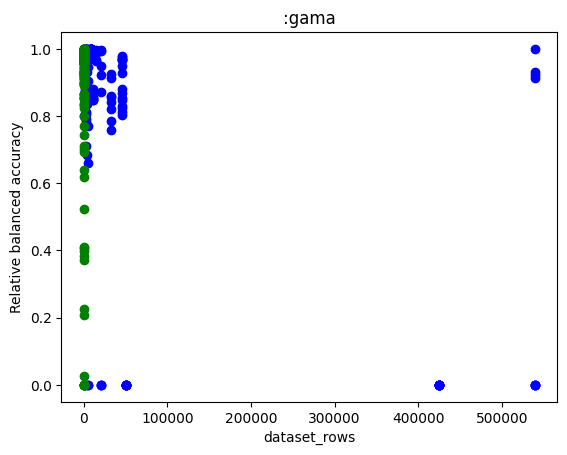

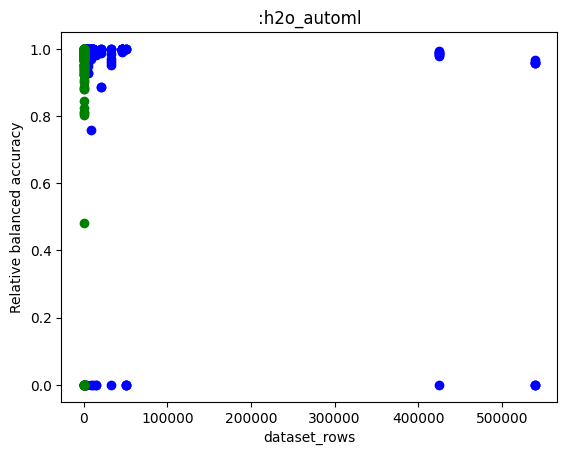

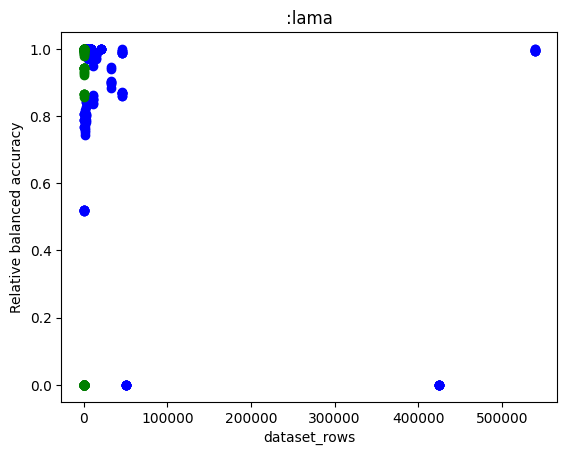

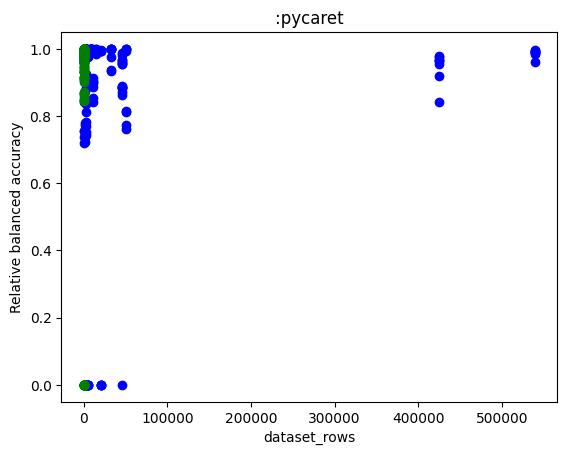

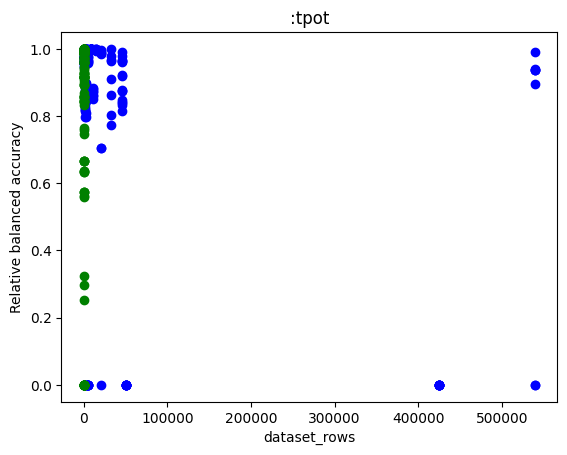

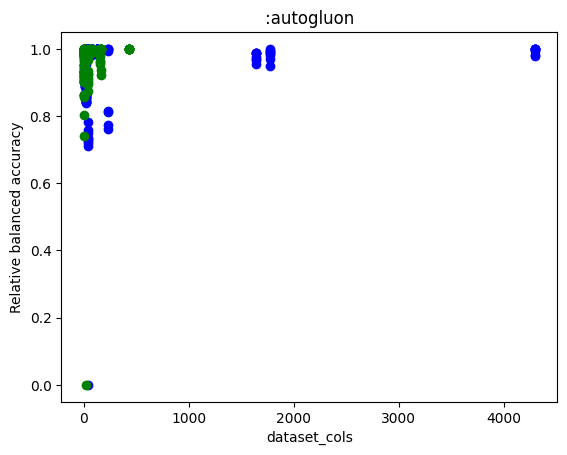

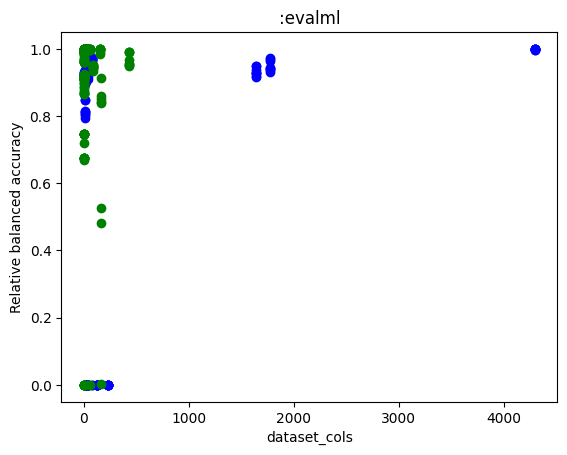

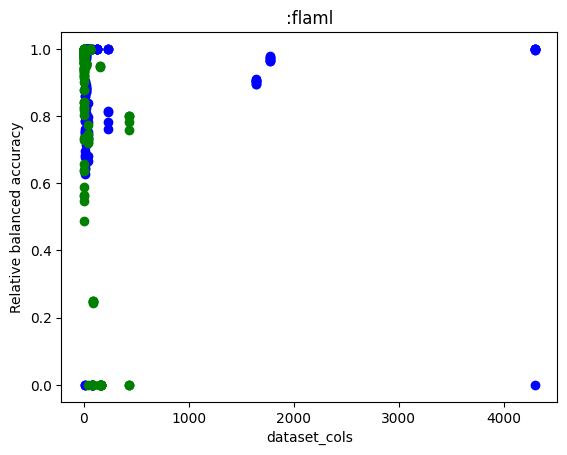

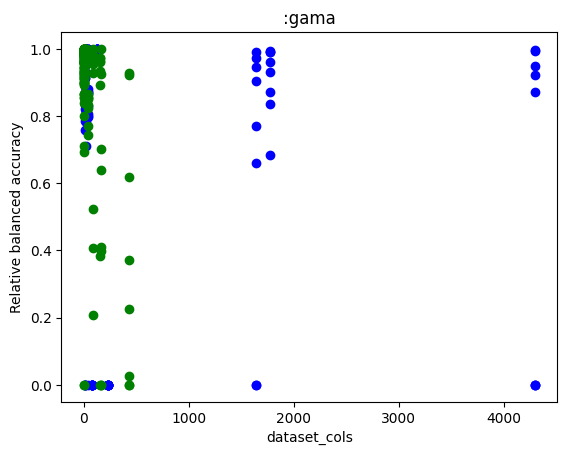

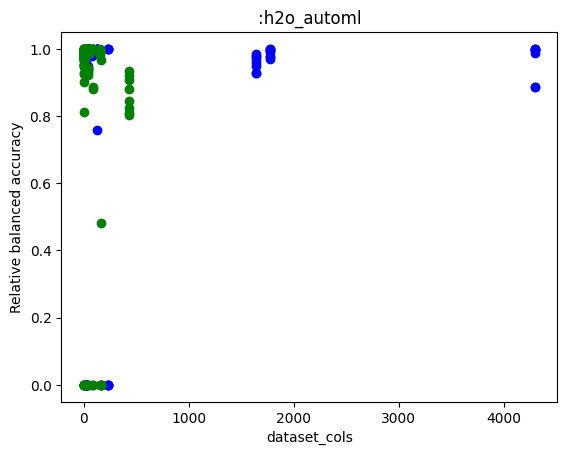

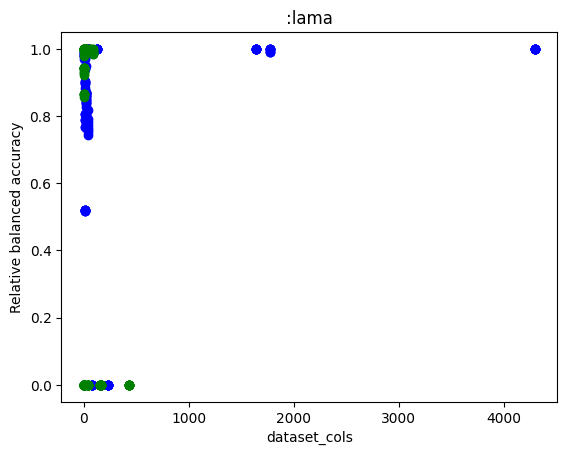

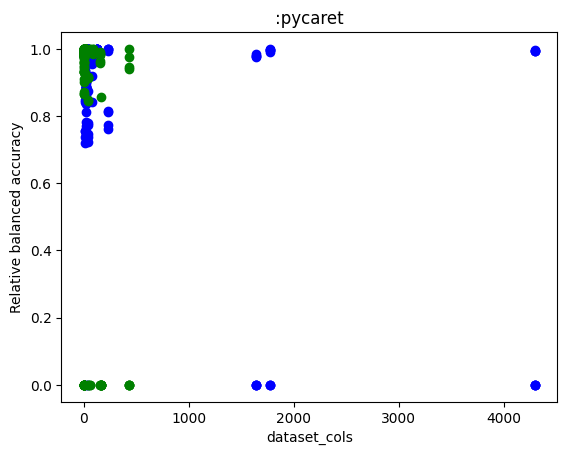

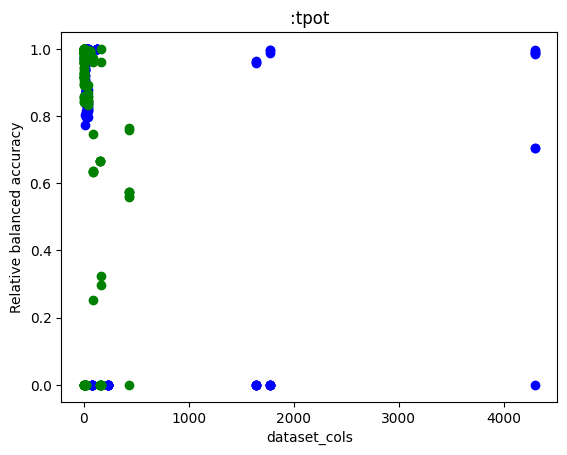

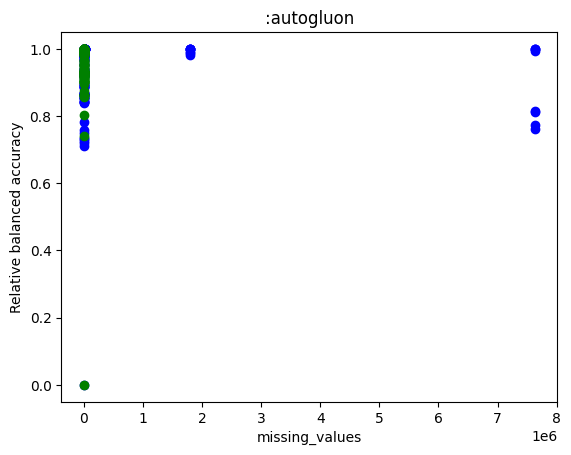

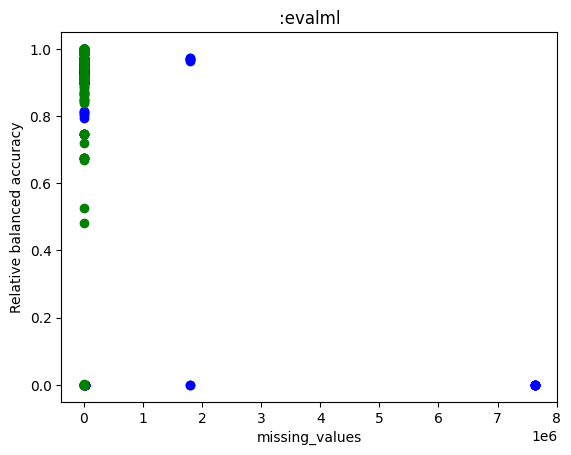

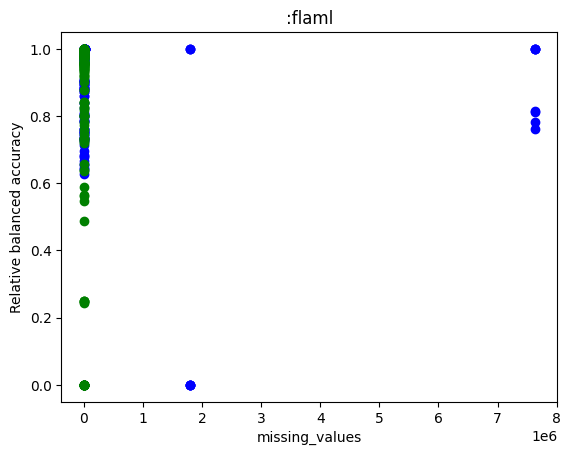

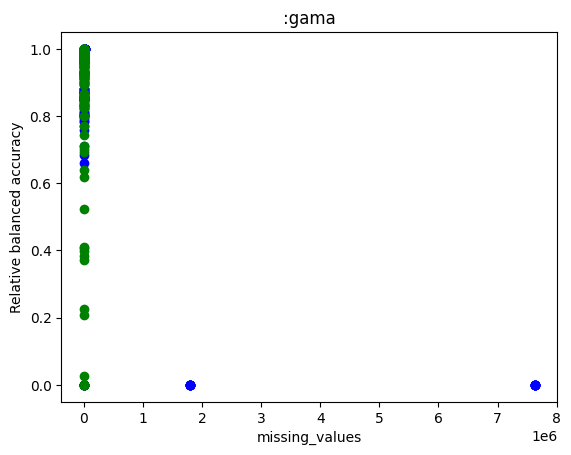

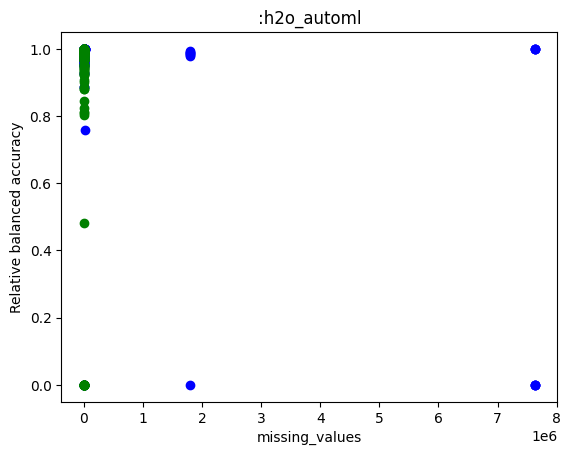

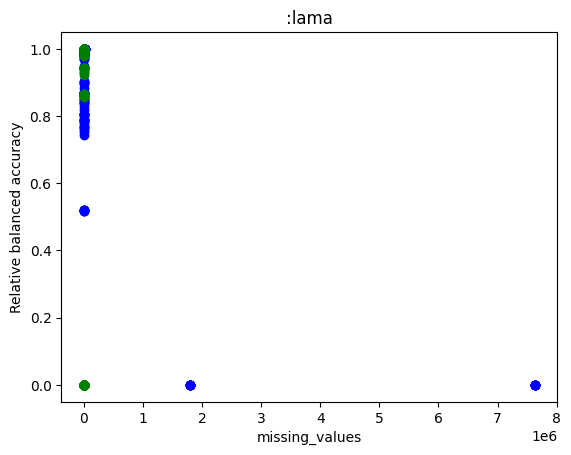

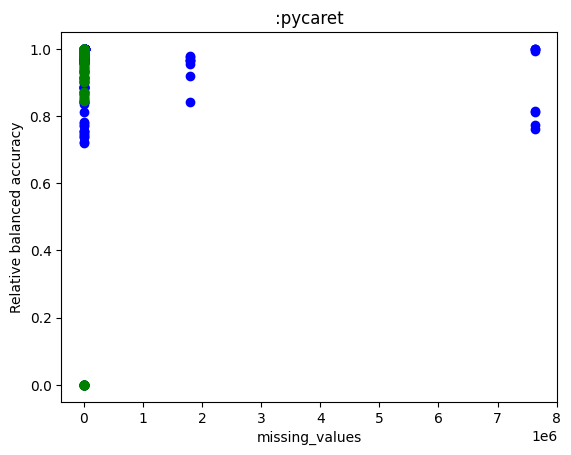

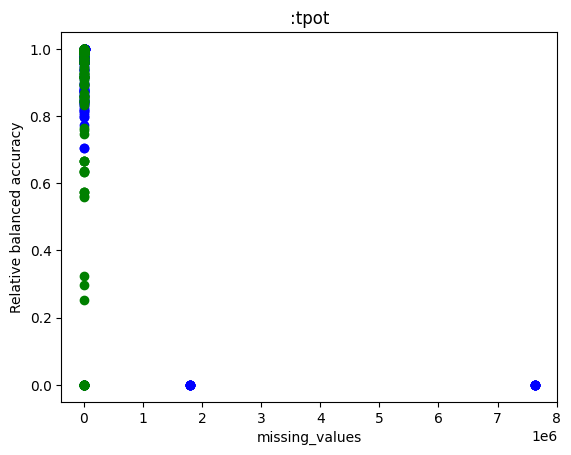

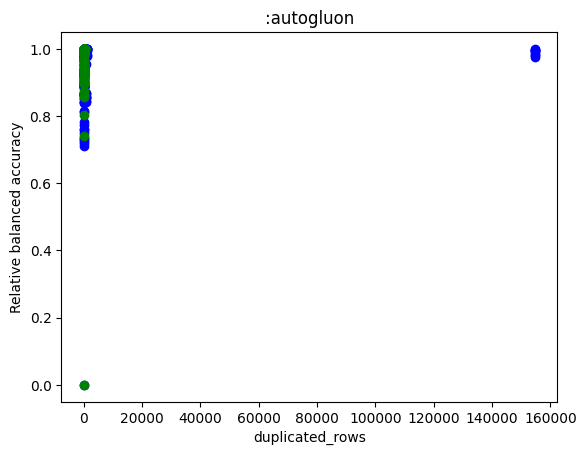

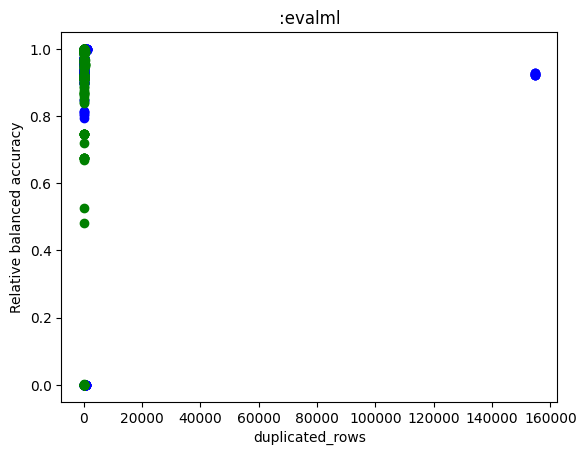

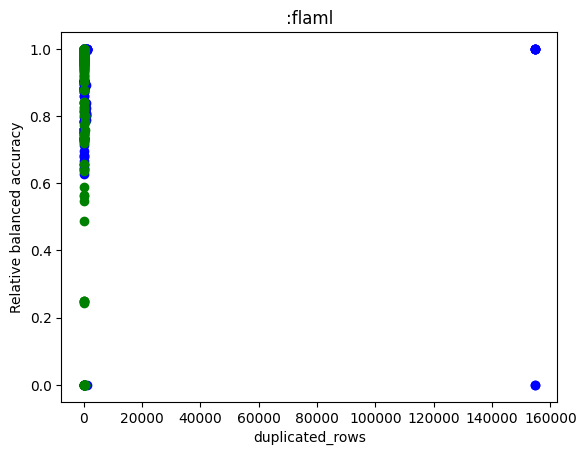

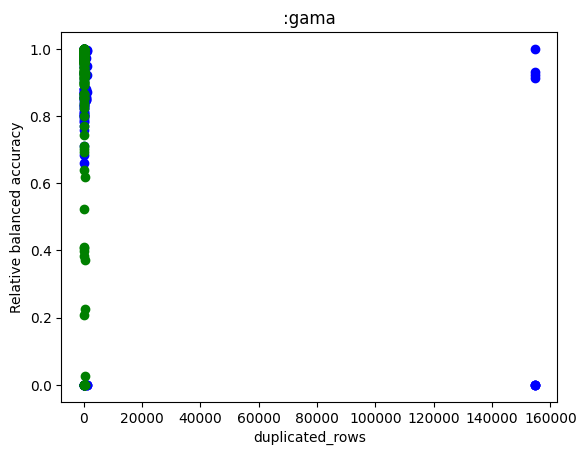

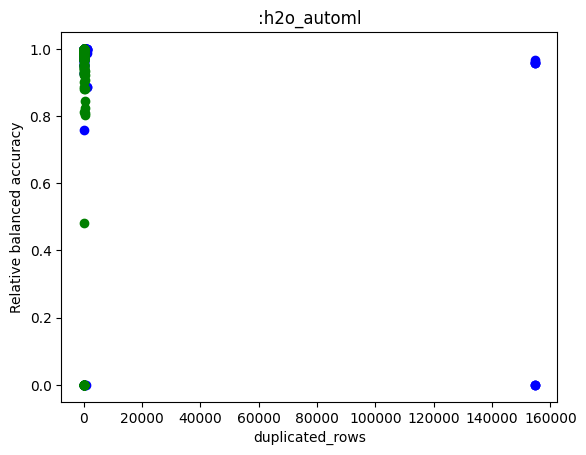

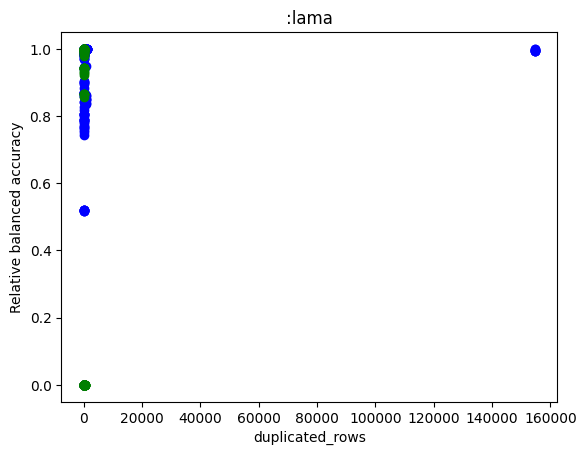

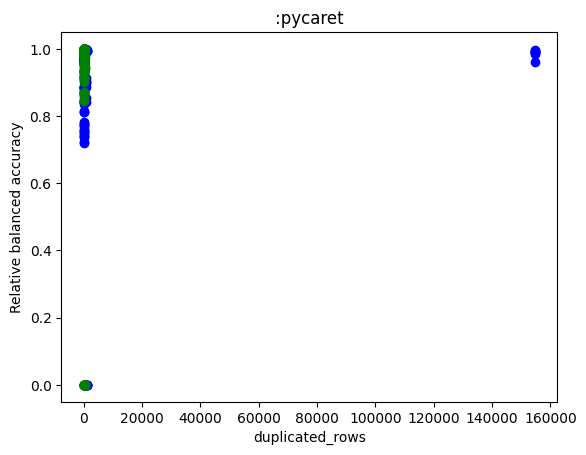

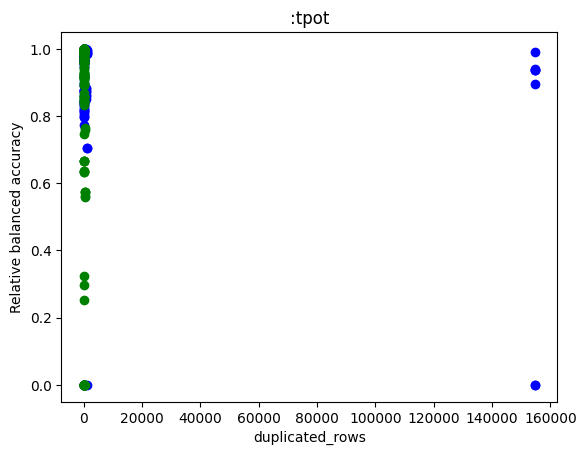

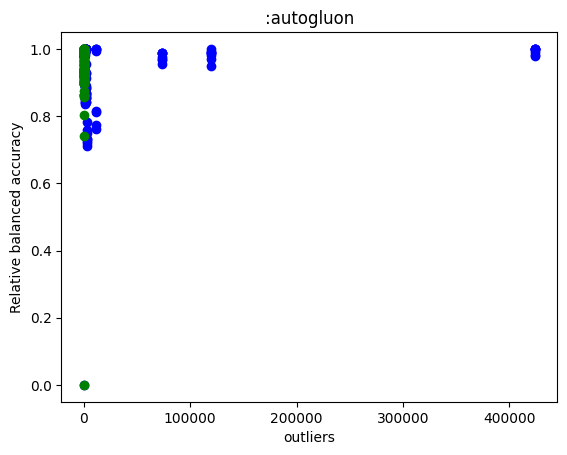

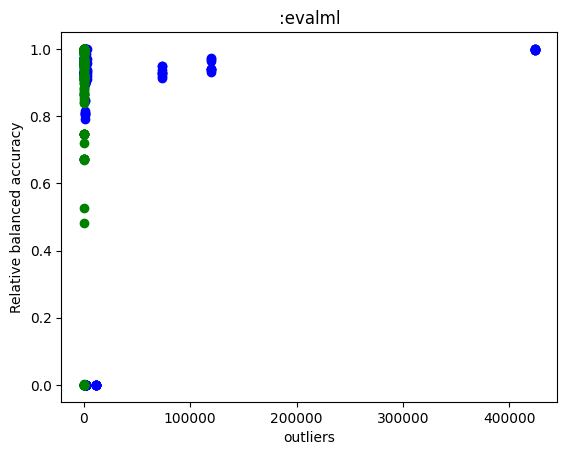

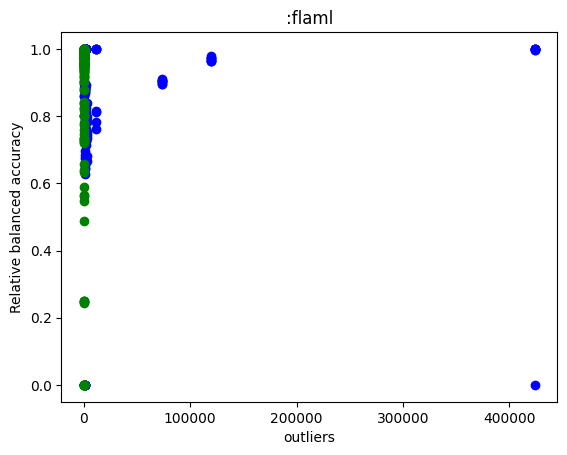

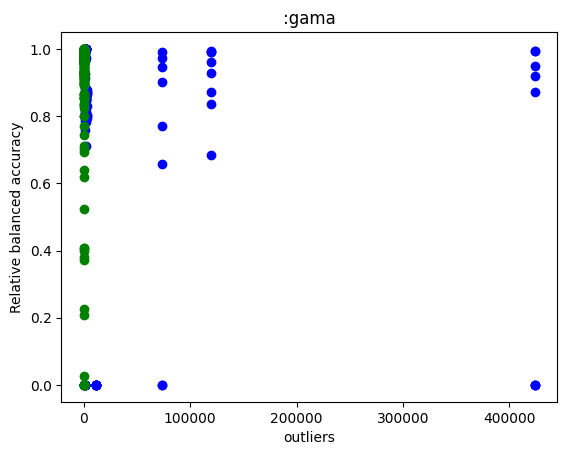

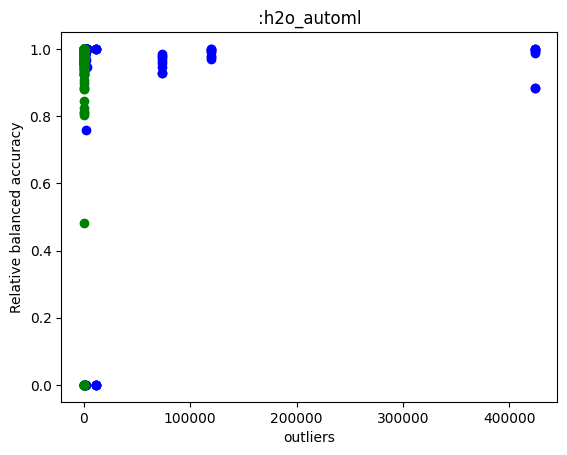

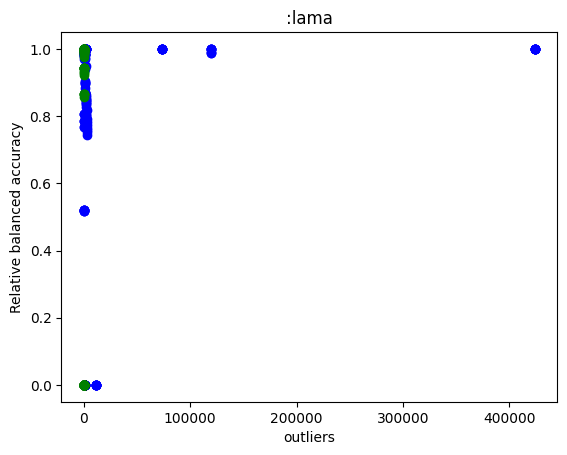

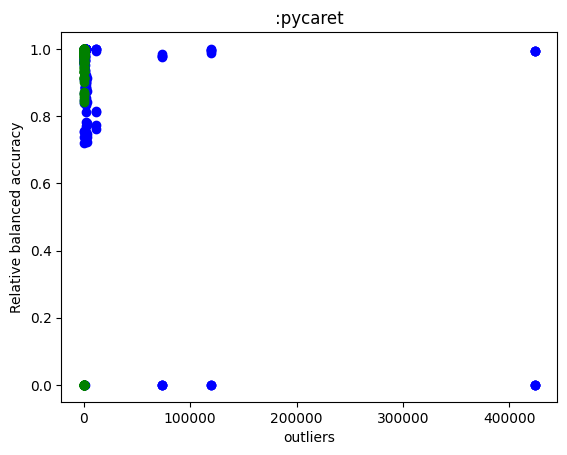

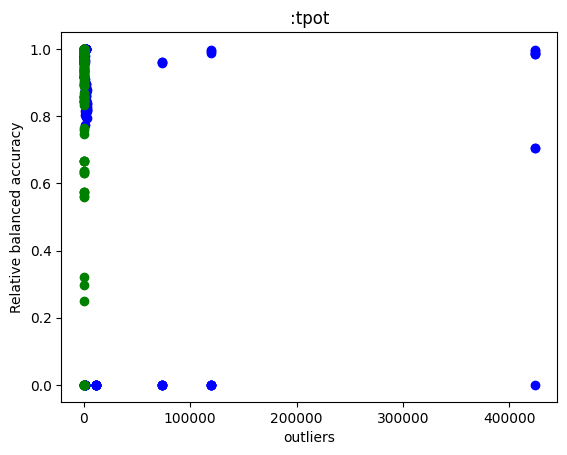

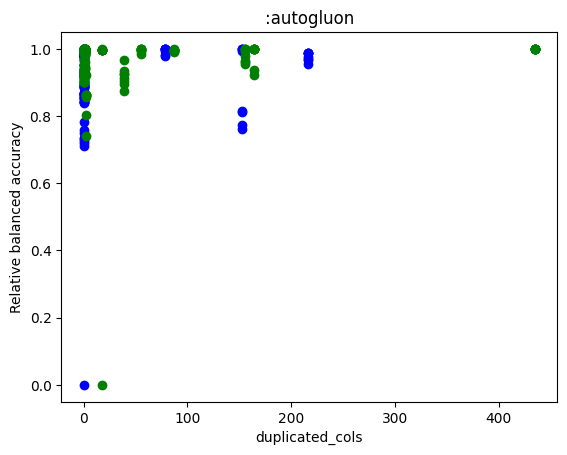

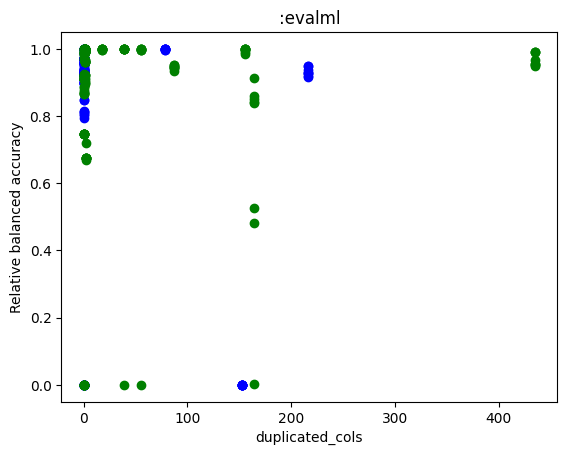

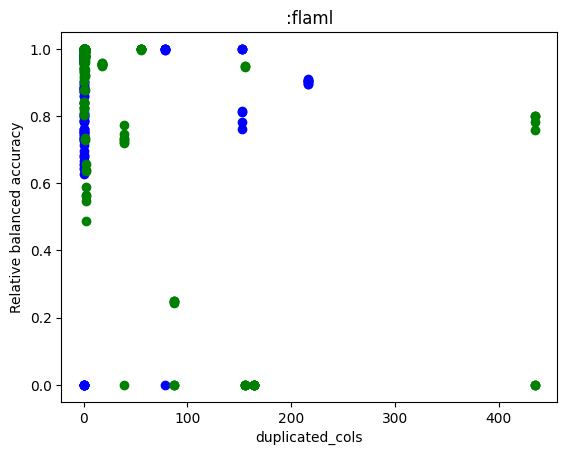

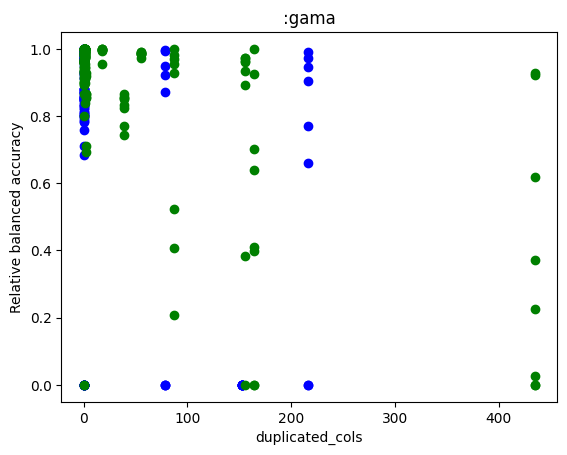

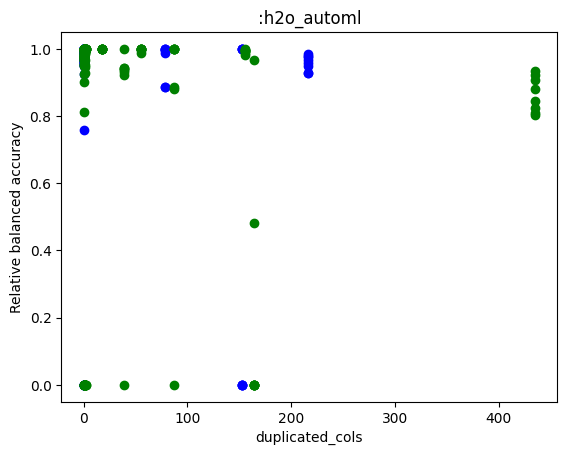

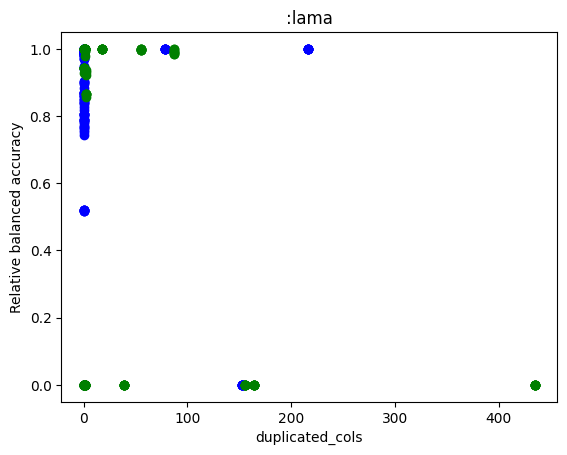

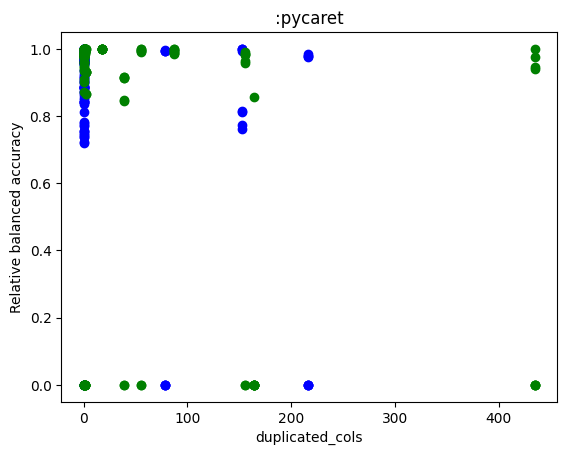

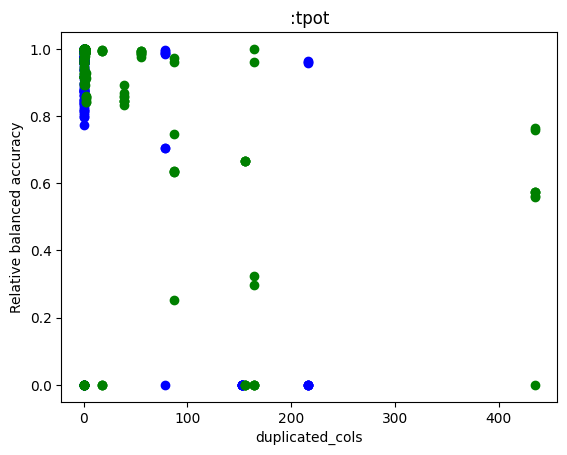

In [21]:
#binary = ["airlines", "KDDCup09_appetency", "electricity", "bank-marketing", "Amazon_employee_access", "eeg-eye-state", "jm1", "SpeedDating", "mushroom", "christine", "phoneme", "Bioresponse", "kr-vs-kp", "kc1", "pc4", "profb", "credit-approval", "breast-w"]
#mulitclass = ["jannis", "shuttle", "tamilnadu-electricity", "letter", "gas-drift", "har", "artificial-characters", "optdigits", "waveform-5000", "splice", "car", "one-hundred-plants-margin", "vehicle", "eucalyptus", "soybean", "LED-display-domain-7digit"]



binary =    ["airlines", "albert", "KDDCup09_appetency", "electricity", "bank-marketing", \
                                                                        "Amazon_employee_access", "riccardo", "eeg-eye-state", "jm1", "SpeedDating", \
                                                                        "mushroom", "christine", "phoneme", "Bioresponse", "kr-vs-kp", \
                                                                        "kc1", "pc4", "profb", "credit-approval", "breast-w"]
                                                                        
multiclass = ["covertype", "dionis", "Devnagari-Script", "jannis", "Fashion-MNIST", \
                                                                        "shuttle", "tamilnadu-electricity", "letter", "gas-drift", "har", \
                                                                        "artificial-characters", "optdigits", "waveform-5000", "splice", "car", \
                                                                        "one-hundred-plants-margin", "vehicle", "eucalyptus", "soybean", "LED-display-domain-7digit" ]
parameters = ["dataset_size_in_mb", "dataset_rows", "dataset_cols", "missing_values", "duplicated_rows", "outliers", "duplicated_cols"]
for para in parameters:
    for group in groups:
        automls = group[1].groupby(["AutoML_adapter"])
        unique_names = group[1]["dataset_name"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        for automl in automls:
            if automl[1]["task"].unique()[0] == ":tabular_classification":
                data_binary = automl[1][automl[1]["dataset_name"].isin(binary)]
                data_multiclass = automl[1][automl[1]["dataset_name"].isin(multiclass)]
                plt.scatter(data_binary[para], data_binary["relative_:balanced_accuracy"], color='blue', label='Binary')
                plt.scatter(data_multiclass["dataset_size_in_mb"], data_multiclass["relative_:balanced_accuracy"], color='green', label='Multiclass')
                automl[1]["AutoML_adapter"].unique()[0],para, "Relative balanced accuracy","Datasetname"
                plt.xlabel(para)
                plt.ylabel("Relative balanced accuracy")
                plt.title(automl[1]["AutoML_adapter"].unique()[0])
                plt.show()


This section is for generating a plot for each task to plot the size in combination with the best runtime limit for each dataset
Also it plots the linear regession for the calculated parameters for the runtime prediction

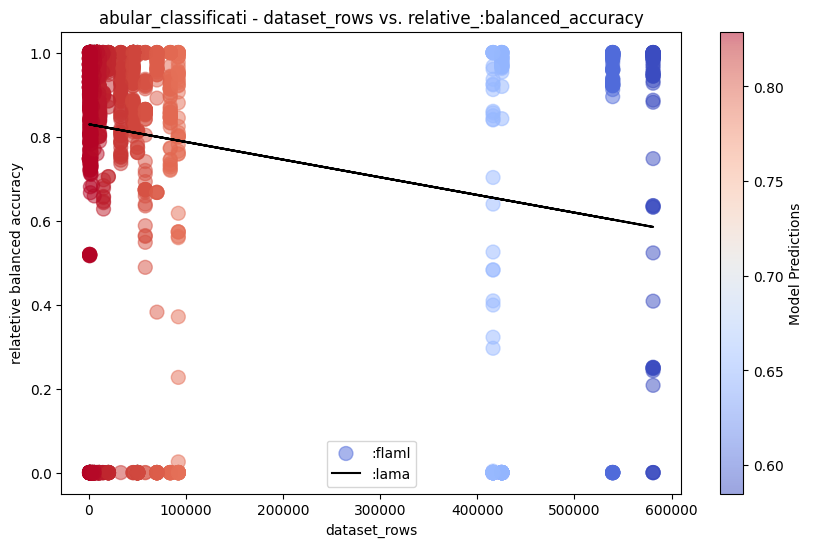

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame containing the data
# filtered_groups = ... (your group filtering code)

parameters = ["dataset_rows"]
for para in parameters:
    for group in groups:
        unique_names = group[1]["AutoML_adapter"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        task = group[1]["task"].unique()[0][2:-2]

        plt.figure(figsize=(10, 6))  # Adjust size as needed

        # Initialize arrays to store data and sizes
        x_all = []
        y_all = []
        sizes = []

        for i, name in enumerate(unique_names):
            data = group[1][group[1]["AutoML_adapter"] == name]
            x = data[para]
            y = data["relative_"+ metric]
            x_all.extend(x)
            y_all.extend(y)
            sizes.extend([100] * len(x))  # Adjust bubble size as needed

        # Perform linear regression
        x = np.array(x_all)
        y = np.array(y_all)
        slope, intercept, r, p, std_err = stats.linregress(x, y)

        # Generate model predictions
        model_predictions = slope * x + intercept

        # Plot scatter with bubble sizes
        plt.scatter(x, y, c=model_predictions, cmap='coolwarm', s=sizes, alpha=0.5)

        # Add color bar for reference
        cb = plt.colorbar()
        cb.set_label('Model Predictions')

        # Plot regression line
        plt.plot(x, slope * x + intercept, color='black')

        # Add labels and title
        plt.xlabel(para)
        plt.ylabel("relatetive balanced accuracy")
        plt.title(f"{task} - {para} vs. relative_{metric}")

        # Add legend
        plt.legend(unique_names)

        plt.show()


dataset_rows Mean Absolute Error (MAE): 0.24553665451643608


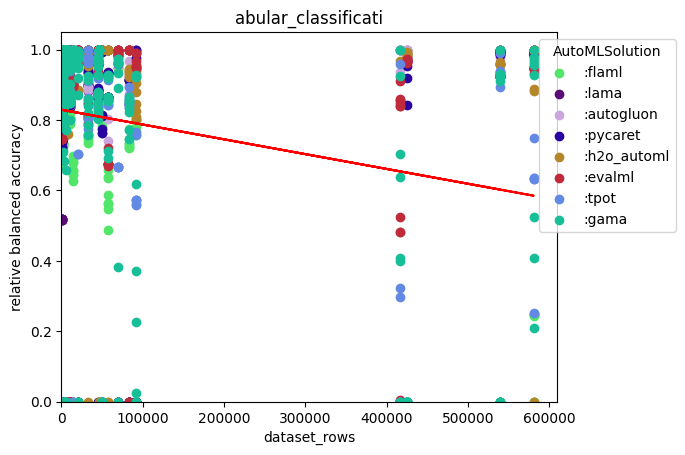

In [23]:

from scipy import stats

#parameters = ["dataset_size_in_mb", "dataset_rows", "dataset_cols", "missing_values", "duplicated_rows", "outliers"]
parameters = ["dataset_rows"]
for para in parameters:
    x = []
    y = []
    for group in groups:
        unique_names = group[1]["AutoML_adapter"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        task = group[1]["task"].unique()[0][2:-2]
        for i, name in enumerate(unique_names):
            data = group[1][group[1]["AutoML_adapter"] == name]
            plt.scatter(data[para], data["relative_"+ metric], label=name, color=colors[i])
            x.extend(data[para].values)
            y.extend(data["relative_"+ metric].values)
        
        def myfunc(x):
            return slope * x + intercept
        
        slope, intercept, r, p, std_err = stats.linregress(x, y)

        mymodel = list(map(myfunc, x))


        plt.plot(x, mymodel, color = "red")

        # Compute absolute errors
        absolute_errors = [abs(actual - predicted) for actual, predicted in zip(np.array(y), np.array(mymodel))]

        # Compute MAE
        mae = sum(absolute_errors) / len(np.array(mymodel))

        print(f"{para} Mean Absolute Error (MAE):", mae)
        
        #x_data = np.linspace(0, group[1]["dataset_size_in_mb"].max() , 100)
        #y_line = [parameter[task]["m"]* x + parameter[task]["b"] for x in x_data]
        #y_line = [parameter[task]["m"]* x for x in x_data]
        #plt.plot(x_data, y_line, color = "red")
        plot(task,para,"relative balanced accuracy", "AutoMLSolution" )
        #plot("Runtime suggestion","Size [MB]","runtime limit", "" )


Parameter: dataset_size_in_mb, Task: abular_classificati
Slope: -0.00047838166418211035, Intercept: 0.8227951915041354, R-squared: 0.023, p-value: 0.000, Std Error: 0.000
dataset_size_in_mb Mean Absolute Error (MAE): 0.248



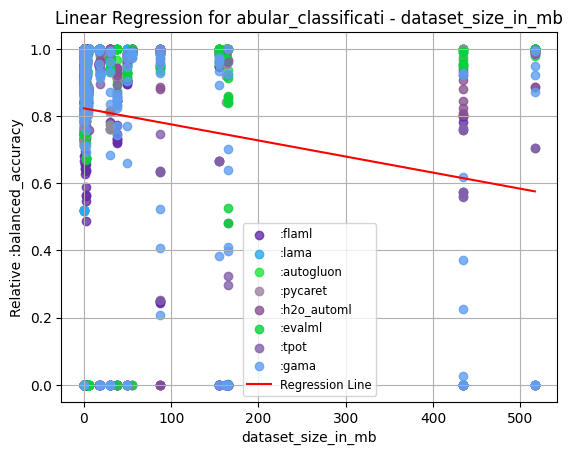

Parameter: dataset_rows, Task: abular_classificati
Slope: -4.205177053308077e-07, Intercept: 0.8291922312242492, R-squared: 0.031, p-value: 0.000, Std Error: 0.000
dataset_rows Mean Absolute Error (MAE): 0.246



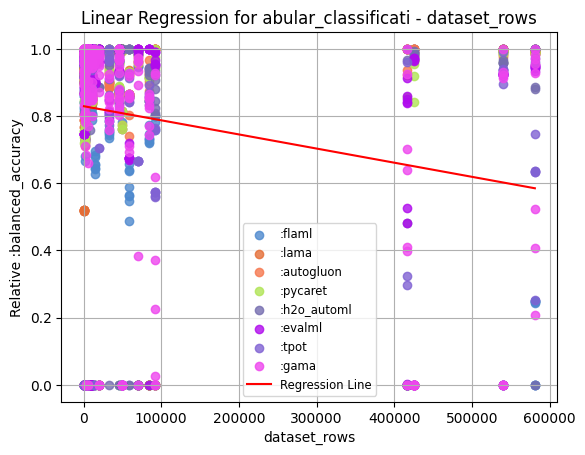

Parameter: dataset_cols, Task: abular_classificati
Slope: -6.369416042743207e-06, Intercept: 0.8032070375599633, R-squared: 0.000, p-value: 0.477, Std Error: 0.000
dataset_cols Mean Absolute Error (MAE): 0.253



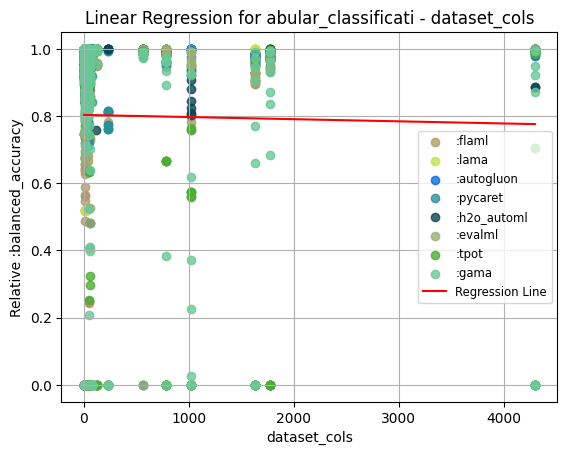

Parameter: missing_values, Task: abular_classificati
Slope: -6.143647616145802e-08, Intercept: 0.8158803562955284, R-squared: 0.047, p-value: 0.000, Std Error: 0.000
missing_values Mean Absolute Error (MAE): 0.243



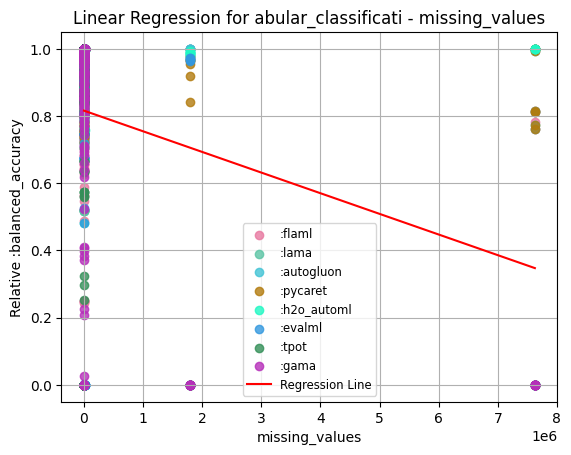

Parameter: duplicated_rows, Task: abular_classificati
Slope: 1.8504669277012196e-08, Intercept: 0.801313264432892, R-squared: 0.000, p-value: 0.948, Std Error: 0.000
duplicated_rows Mean Absolute Error (MAE): 0.253



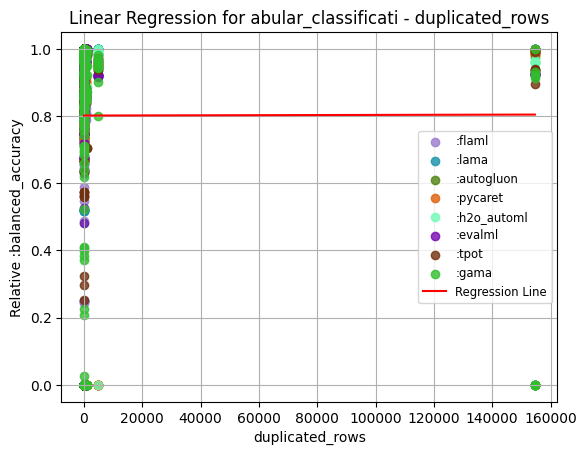

Parameter: outliers, Task: abular_classificati
Slope: 5.8924829326934874e-08, Intercept: 0.8002936294359658, R-squared: 0.000, p-value: 0.554, Std Error: 0.000
outliers Mean Absolute Error (MAE): 0.253



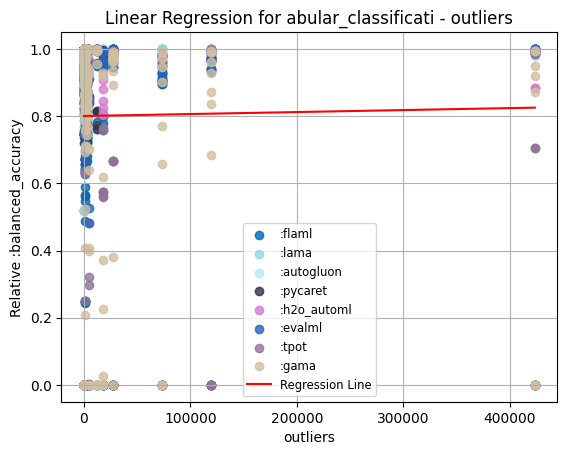

In [24]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# List of parameters for regression
parameters = ["dataset_size_in_mb", "dataset_rows", "dataset_cols", "missing_values", "duplicated_rows", "outliers"]

# Define a function for plotting
def plot_with_regression(group, para, metric):
    x = []
    y = []
    
    unique_names = group["AutoML_adapter"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)  # Random colors for AutoML solutions
    task = group["task"].unique()[0][2:-2]
    
    # Scatter plot for each AutoML solution
    for i, name in enumerate(unique_names):
        data = group[group["AutoML_adapter"] == name]
        plt.scatter(
            data[para],
            data["relative_" + metric],
            label=name,
            color=colors[i],
            alpha=0.8
        )
        x.extend(data[para].values)
        y.extend(data["relative_" + metric].values)

    # Perform linear regression
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"Parameter: {para}, Task: {task}")
    print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r**2:.3f}, p-value: {p:.3f}, Std Error: {std_err:.3f}")
    
    # Generate regression line
    x_range = np.linspace(min(x), max(x), 100)
    y_range = slope * x_range + intercept
    plt.plot(x_range, y_range, color="red", label="Regression Line")

    # Compute MAE (Mean Absolute Error)
    predicted = [slope * val + intercept for val in x]
    absolute_errors = [abs(actual - predicted) for actual, predicted in zip(y, predicted)]
    mae = sum(absolute_errors) / len(absolute_errors)
    print(f"{para} Mean Absolute Error (MAE): {mae:.3f}\n")
    
    # Add labels, legend, and title
    plt.xlabel(para)
    plt.ylabel(f"Relative {metric}")
    plt.title(f"Linear Regression for {task} - {para}")
    plt.legend(loc="best", fontsize="small")
    plt.grid(True)
    plt.show()

# Loop through all groups and parameters
for group in groups:
    for para in parameters:
        plot_with_regression(group[1], para, metric)
